In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# 20 frames experimentation

In [195]:
df_20 = pd.read_csv('C:/Users/BRENDA/Documents/SOTA/KNN/PSL-GAN-ad521b837aa1cabd3bbc6e72459104d0ca7cb72a/data.csv')
df_20.head(2000)

,videoname,axis,n_frame,n_landmark,coordinate
0,A-L-E-X_271,x,0,0,0.464181
1,A-L-E-X_271,x,0,1,0.487545
2,A-L-E-X_271,x,0,2,0.502058
3,A-L-E-X_271,x,0,3,0.515145
4,A-L-E-X_271,x,0,4,0.439742
...,...,...,...,...,...
1995,A-N-D-R-E-A_236,x,18,17,0.548930
1996,A-N-D-R-E-A_236,x,18,18,0.498340
1997,A-N-D-R-E-A_236,x,18,19,0.544108
1998,A-N-D-R-E-A_236,x,18,20,0.517469


In [197]:
df_20 = df_20[~df_20['videoname'].astype(str).str.startswith('NNN')]
df_20

,videoname,axis,n_frame,n_landmark,coordinate,class
0,A-L-E-X_271,x,0,0,0.464181,A-L-E-X
1,A-L-E-X_271,x,0,1,0.487545,A-L-E-X
2,A-L-E-X_271,x,0,2,0.502058,A-L-E-X
3,A-L-E-X_271,x,0,3,0.515145,A-L-E-X
4,A-L-E-X_271,x,0,4,0.439742,A-L-E-X
...,...,...,...,...,...,...
318315,él_311,y,20,18,0.446793,él
318316,él_311,y,20,19,0.798213,él
318317,él_311,y,20,20,0.413768,él
318318,él_311,y,20,21,0.789132,él


In [198]:
df_20['class'] = df_20['videoname'].apply(lambda x: x.split('_')[0])
x_20 = df_20.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_20['videoname']))
temp_20 = pd.DataFrame(x_20['coordinate'].tolist())
temp_20

['A-L-E-X_271' 'A-L-E-X_275' 'A-N-D-R-E-A_236'
 'C A R B O H I D R A T O S_533' 'C A R B O H I D R A T O S_554'
 'C H U Ñ O_107' 'C H U Ñ O_225' 'M I N E R A L E S_398'
 'M I N E R A L E S_536' 'M-A-R-C-O_269' 'M-A-R-C-O_273'
 'P A T R I C I A_526' 'P A T R I C I A_615' 'P A T R I C I A_8'
 'P R O T E I N A S_543' 'P R O T E I N A_550' 'P-A-T-R-I-C-I-A_4'
 'P-U-B-E-R-T-A-D_52' 'PA T R I C I A_515' 'Perú_512' '_440' '___794'
 '____812' 'abuelo_255' 'aceptar_185' 'aceptar_66' 'acuerdo_112'
 'agrupar_353' 'agua_177' 'agua_537' 'ahora_243' 'ahora_246' 'ahora_64'
 'ahora_690' 'ahora_801' 'alegría_284' 'alimentos_693' 'alrededor_94'
 'amarrar_181' 'ambiente_203' 'ambiente_229' 'animal_671' 'animales_652'
 'animales_675' 'animales_702' 'antes_114' 'antes_248' 'antes_283'
 'antes_82' 'aprender_195' 'aprender_217' 'aprender_27' 'aprender_282'
 'aprender_35' 'aprender__466' 'aproximadamente_745' 'aproximado_707'
 'asco_293' 'atención_305' 'avanzar_160' 'ayudarme_574' 'ayudarte_808'
 'balancear_4

,0,1,2,3,4,5,6,7,8,9,...,910,911,912,913,914,915,916,917,918,919
0,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.678018,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085
1,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.606166,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895
2,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.701851,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628
3,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.842139,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310
4,0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,0.530614,...,0.810638,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,0.502255,...,0.695857,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241
342,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.683784,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078
343,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,0.552738,...,0.830198,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243
344,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.813259,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603


In [35]:
'''
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

import numpy
numpy.set_printoptions(threshold=sys.maxsize)
'''

In [199]:
temp_20.insert(0,"instance",['A-L-E-X_271','A-L-E-X_275','A-N-D-R-E-A_236'
,'C,A,R,B,O,H,I,D,R,A,T,O,S_533','C,A,R,B,O,H,I,D,R,A,T,O,S_554'
,'C,H,U,Ñ,O_107','C,H,U,Ñ,O_225','M,I,N,E,R,A,L,E,S_398'
,'M,I,N,E,R,A,L,E,S_536','M-A-R-C-O_269','M-A-R-C-O_273'
,'P,A,T,R,I,C,I,A_526','P,A,T,R,I,C,I,A_615','P,A,T,R,I,C,I,A_8'
,'P,R,O,T,E,I,N,A,S_543','P,R,O,T,E,I,N,A_550','P-A-T-R-I-C-I-A_4'
,'P-U-B-E-R-T-A-D_52','PA,T,R,I,C,I,A_515','Perú_512','_440','___794'
,'____812','abuelo_255','aceptar_185','aceptar_66','acuerdo_112'
,'agrupar_353','agua_177','agua_537','ahora_243','ahora_246','ahora_64'
,'ahora_690','ahora_801','alegría_284','alimentos_693','alrededor_94'
,'amarrar_181','ambiente_203','ambiente_229','animal_671','animales_652'
,'animales_675','animales_702','antes_114','antes_248','antes_283'
,'antes_82','aprender_195','aprender_217','aprender_27','aprender_282'
,'aprender_35','aprender__466','aproximadamente_745','aproximado_707'
,'asco_293','atención_305','avanzar_160','ayudarme_574','ayudarte_808'
,'balancear_428','bien_241','bien_244','bien_278','bien_295','bien_39'
,'bien_401','bienvenida_5','botar_205','brotar,planta_137','brotar_117'
,'bueno_77','cada,uno_563','cada,uno_714','cada,uno_748','cambiar_108'
,'cambiar_140','cambiar_50','cantidad_447','carne_111','carne_423'
,'carne_683','casa_256','casa_29','cerdo_685','colores_798','comer_323'
,'comer_422','comer_437','comer_444','comer_590','comer_625','comer_644'
,'comer_709','comer_765','comida_539','conocer_83','contenta_238'
,'contento_516','continuar_26','continuar_356','controlar_176'
,'controlar_192','convivencia_245','crecer_120','crecer_136'
,'cuadricula_796','cuadrícula_811','cualquiera_34','cubrir_180'
,'cuerpo_476','cuerpo_597','cuerpo_599','cuerpo_605','cuerpo_67'
,'cuál_251','cuál_389','cuánto_405','cuánto_460','cuántos_443','cómo_44'
,'cómo_85','cómo_90','darte_375','decir_138','dejar,frasco_191'
,'dentro_596','depende_716','descubrir_14','destapar_183'
,'diariamente_402','diariamente_479','diariamente_785','diferentes_471'
,'diferentes_569','diferentes_668','diferentes_689','diferentes_750'
,'doce_59','dormir_268','dos_280','día_261','edad_718','ellos_754'
,'ellos_767','ellos_772','emoción_143','emoción_250','emoción_43'
,'emoción_54','emoción_71','empezar_32','enojar_124','enojar_276'
,'enojar_99','enojo_177','ensalada_436','entender_141','entonces_480'
,'escribir_56','escribir_797','ese_642','eso_110','este_63','explicar_42'
,'faltar_142','familia_204','familia_75','feliz_15','fluir_187'
,'frecuentemente_192','frijol_175','fuerte_310','fuerte_314','fuerte_363'
,'fuerte_487','fácil_341','gaseosa_331','gracias_233','grande_139'
,'grasa_396','grasa_534','gritar_122','guardar_87','guardar_97'
,'gustar_453','habitación_270','hacer_158','hermano_116','hermano_169'
,'hermanos_32','historia_212','hola_509','hola_513','hola_632','hoy_221'
,'hoy_540','huevo_679','importante_545','importante_629','impulsar_593'
,'incluir_394','informar_482','ingerir_546','inteligente_259'
,'interesante_113','ira_285','jugar_115','jugar_130','jugar_98'
,'juntos_36','juntos_618','listo_31','llamar_46','llamar_614','llorar_120'
,'luego_188','mamá_154','manera_85','mañana_2','menos_166','meter_178'
,'miedo_292','ministerio_11','mismos_182','mover_589','mundo_15'
,'más,o,menos_752','necesitar_474','niños_749','niños_776','no_108'
,'no_166','no_289','nombre_73','normal_198','objetivo_208','objetivo_220'
,'paciencia_153','papas,fritas_332','participar_637','pensar_406'
,'pensar_771','perder_127','perfecto_36','pero_442','pescado_684'
,'planta_119','planta_133','planta_159','planta_215','planta_435'
,'plantarse_135','pollo_686','porcentaje_491','porcentaje_495'
,'porción_421','positivo_199','preguntar_75','primaria_22','primaria_5'
,'primero_174','primo_104','primo_38','probar_254','problema_227'
,'proceso_170','proceso_351','propia_213','proteina_551','proteína_531'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_694'
,'proteínas_784','pubertad_48','querer_257','queso_354','quinto_773'
,'quinua_325','qué_573','qué_727','recordar_169','recordar_247'
,'regla_814','relación_161','sal_112','seco_222','seguir_13'
,'seleccionar_222','seleccionar_68','semana_180','semana_40','sentir_16'
,'sentir_187','sentir_591','sentir_602','sentir_604','sentir_89'
,'sexto_24','sexto_759','siguiente,1_206','siguiente_216','solo_663'
,'sorpresa_294','sí_242','sí_253','sí_277','sí_281','sí_76','sí_83'
,'también_114','también_124','tema_541','temperatura_109','tiempo_49'
,'tiempo_91','todo_320','todo_58','tristeza_291','tú_247','uno_260'
,'usar_214','ustedes_239','vaca_653','vaca_662','valor_764','venir_26'
,'venir_31','venir_617','venir_818','ver_49','verduras_673','vitamina_397'
,'vitaminas_328','vitaminas_366','vitaminas_535','volver_786','yo_125'
,'yo_235','él_290','él_295','él_311'],True)

In [200]:
temp_20

,instance,0,1,2,3,4,5,6,7,8,...,910,911,912,913,914,915,916,917,918,919
0,A-L-E-X_271,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,...,0.678018,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085
1,A-L-E-X_275,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,...,0.606166,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895
2,A-N-D-R-E-A_236,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,...,0.701851,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628
3,"C,A,R,B,O,H,I,D,R,A,T,O,S_533",0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,...,0.842139,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310
4,"C,A,R,B,O,H,I,D,R,A,T,O,S_554",0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,...,0.810638,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,yo_125,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,...,0.695857,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241
342,yo_235,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,...,0.683784,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078
343,él_290,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,...,0.830198,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243
344,él_295,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,...,0.813259,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603


In [201]:
temp_20['class'] = temp_20['instance'].apply(lambda x: x.split('_')[0])

In [202]:
temp_20

,instance,0,1,2,3,4,5,6,7,8,...,911,912,913,914,915,916,917,918,919,class
0,A-L-E-X_271,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,...,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085,A-L-E-X
1,A-L-E-X_275,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,...,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895,A-L-E-X
2,A-N-D-R-E-A_236,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,...,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628,A-N-D-R-E-A
3,"C,A,R,B,O,H,I,D,R,A,T,O,S_533",0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,...,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310,"C,A,R,B,O,H,I,D,R,A,T,O,S"
4,"C,A,R,B,O,H,I,D,R,A,T,O,S_554",0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,...,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766,"C,A,R,B,O,H,I,D,R,A,T,O,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,yo_125,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,...,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241,yo
342,yo_235,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
343,él_290,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,...,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243,él
344,él_295,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,...,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603,él


In [203]:
dataset = temp_20.iloc[ : ,1:923]

In [204]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,class
0,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085,A-L-E-X
1,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895,A-L-E-X
2,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628,A-N-D-R-E-A
3,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310,"C,A,R,B,O,H,I,D,R,A,T,O,S"
4,0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,0.530614,...,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766,"C,A,R,B,O,H,I,D,R,A,T,O,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,0.502255,...,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241,yo
342,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
343,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,0.552738,...,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243,él
344,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603,él


In [73]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [74]:
X

array([[0.46418068, 0.48754507, 0.50205845, ..., 0.61788642, 0.46877483,
        0.60908526],
       [0.41979352, 0.43647838, 0.45126101, ..., 0.65484178, 0.3728528 ,
        0.64189488],
       [0.42923865, 0.4564161 , 0.47523952, ..., 0.67953998, 0.40995616,
        0.66662759],
       ...,
       [0.51833123, 0.54062569, 0.55522799, ..., 0.42468324, 0.81902939,
        0.44924268],
       [0.50071037, 0.52654034, 0.54319745, ..., 0.43887141, 0.82716894,
        0.45960298],
       [0.50100517, 0.52434278, 0.54087126, ..., 0.41376814, 0.78913236,
        0.44206053]])

In [205]:
y

array(['A-L-E-X', 'A-L-E-X', 'A-N-D-R-E-A', 'C,A,R,B,O,H,I,D,R,A,T,O,S',
       'C,A,R,B,O,H,I,D,R,A,T,O,S', 'C,H,U,Ñ,O', 'C,H,U,Ñ,O',
       'M,I,N,E,R,A,L,E,S', 'M,I,N,E,R,A,L,E,S', 'M-A-R-C-O', 'M-A-R-C-O',
       'P,A,T,R,I,C,I,A', 'P,A,T,R,I,C,I,A', 'P,A,T,R,I,C,I,A',
       'P,R,O,T,E,I,N,A,S', 'P,R,O,T,E,I,N,A', 'P-A-T-R-I-C-I-A',
       'P-U-B-E-R-T-A-D', 'PA,T,R,I,C,I,A', 'Perú', '', '', '', 'abuelo',
       'aceptar', 'aceptar', 'acuerdo', 'agrupar', 'agua', 'agua',
       'ahora', 'ahora', 'ahora', 'ahora', 'ahora', 'alegría',
       'alimentos', 'alrededor', 'amarrar', 'ambiente', 'ambiente',
       'animal', 'animales', 'animales', 'animales', 'antes', 'antes',
       'antes', 'antes', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aproximadamente', 'aproximado', 'asco',
       'atención', 'avanzar', 'ayudarme', 'ayudarte', 'balancear', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bienvenida', 'botar',
       'brotar,planta', 'br

In [206]:

import numpy as np
 
# function to get unique values
def unique(y):
    x = np.array(y)
    print(np.unique(x))

unique(y)

['' 'A-L-E-X' 'A-N-D-R-E-A' 'C,A,R,B,O,H,I,D,R,A,T,O,S' 'C,H,U,Ñ,O'
 'M,I,N,E,R,A,L,E,S' 'M-A-R-C-O' 'P,A,T,R,I,C,I,A' 'P,R,O,T,E,I,N,A'
 'P,R,O,T,E,I,N,A,S' 'P-A-T-R-I-C-I-A' 'P-U-B-E-R-T-A-D' 'PA,T,R,I,C,I,A'
 'Perú' 'abuelo' 'aceptar' 'acuerdo' 'agrupar' 'agua' 'ahora' 'alegría'
 'alimentos' 'alrededor' 'amarrar' 'ambiente' 'animal' 'animales' 'antes'
 'aprender' 'aproximadamente' 'aproximado' 'asco' 'atención' 'avanzar'
 'ayudarme' 'ayudarte' 'balancear' 'bien' 'bienvenida' 'botar' 'brotar'
 'brotar,planta' 'bueno' 'cada,uno' 'cambiar' 'cantidad' 'carne' 'casa'
 'cerdo' 'colores' 'comer' 'comida' 'conocer' 'contenta' 'contento'
 'continuar' 'controlar' 'convivencia' 'crecer' 'cuadricula' 'cuadrícula'
 'cualquiera' 'cubrir' 'cuerpo' 'cuál' 'cuánto' 'cuántos' 'cómo' 'darte'
 'decir' 'dejar,frasco' 'dentro' 'depende' 'descubrir' 'destapar'
 'diariamente' 'diferentes' 'doce' 'dormir' 'dos' 'día' 'edad' 'ellos'
 'emoción' 'empezar' 'enojar' 'enojo' 'ensalada' 'entender' 'entonces'
 'esc

In [207]:
Labelencoder_Y = LabelEncoder()
y= Labelencoder_Y.fit_transform(y)
y

array([  1,   1,   2,   3,   3,   4,   4,   5,   5,   6,   6,   7,   7,
         7,   9,   8,  10,  11,  12,  13,   0,   0,   0,  14,  15,  15,
        16,  17,  18,  18,  19,  19,  19,  19,  19,  20,  21,  22,  23,
        24,  24,  25,  26,  26,  26,  27,  27,  27,  27,  28,  28,  28,
        28,  28,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  37,
        37,  37,  37,  37,  38,  39,  41,  40,  42,  43,  43,  43,  44,
        44,  44,  45,  46,  46,  46,  47,  47,  48,  49,  50,  50,  50,
        50,  50,  50,  50,  50,  50,  51,  52,  53,  54,  55,  55,  56,
        56,  57,  58,  58,  59,  60,  61,  62,  63,  63,  63,  63,  63,
        64,  64,  65,  65,  66,  67,  67,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  75,  75,  76,  76,  76,  76,  76,  77,  78,  79,
        80,  81,  82,  82,  82,  83,  83,  83,  83,  83,  84,  85,  85,
        85,  86,  87,  88,  89,  90,  90,  91,  92,  93,  94,  95,  96,
        96,  97,  98,  99, 100, 101, 101, 101, 101, 102, 103, 10

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

([<matplotlib.axis.XTick at 0x2720d16e848>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

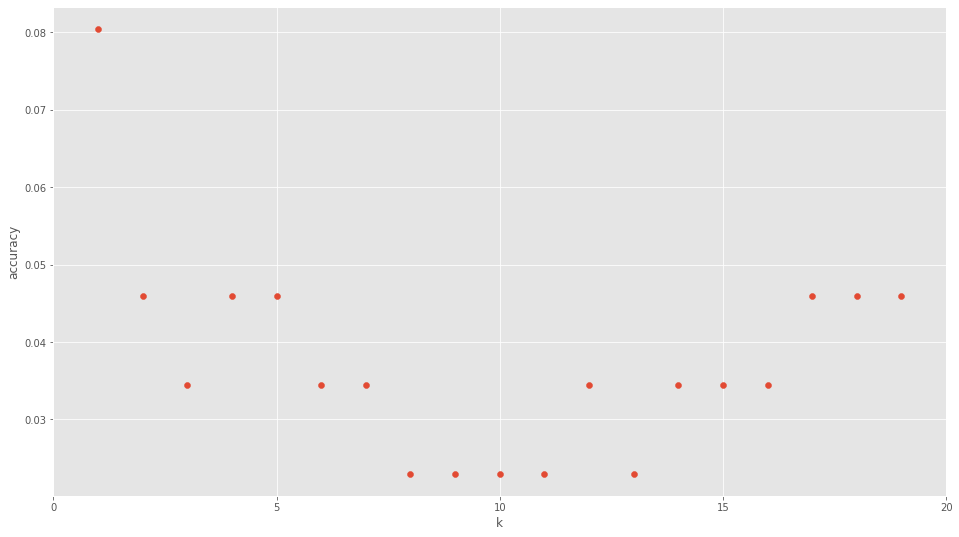

In [209]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# Base : 8% accuracy test

In [210]:
n_neighbors = 1
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.08


In [211]:
import pandas as pd
#pd.set_option('display.max_rows', 11500)
#pd.set_option('display.max_columns', 11500)
#pd.set_option('display.width', 111000)
#pd.set_option('display.expand_frame_repr', False)

# Environment settings: 
'''
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
'''
#pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

#pd.options.display.max_rows = 999

pred = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
print(cf_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


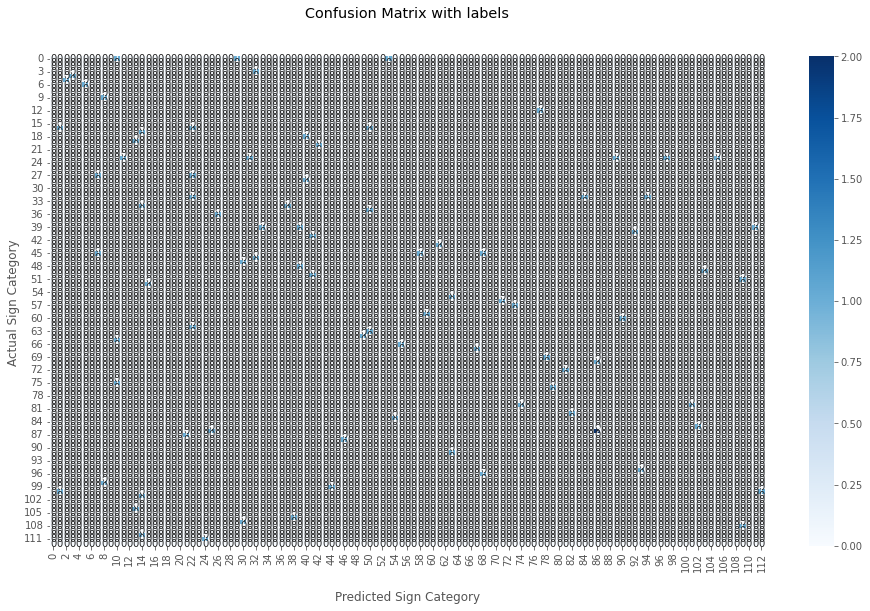

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Sign Category')
ax.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

'''
temp1 = ax.xaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp1.array()


temp2 = ax.yaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp2.shape
'''
## Display the visualization of the Confusion Matrix.
plt.show()

# Tokenization

In [77]:
# Perform standard imports:
import es_core_news_sm #español
import spacy
nlp = es_core_news_sm.load()
doc1 = nlp(u"A-L-E-X A-N-D-R-E-A C,A,R,B,O,H,I,D,R,A,T,O,S C,H,U,Ñ,O M,I,N,E,R,A,L,E,S M-A-R-C-O P,A,T,R,I,C,I,A P,R,O,T,E,I,N,A P,R,O,T,E,I,N,A,S P-A-T-R-I-C-I-A P-U-B-E-R-T-A-D PA,T,R,I,C,I,A Perú abuelo aceptar acuerdo agrupar agua ahora alegría alimentos alrededor amarrar ambiente animal animales antes aprender aproximadamente aproximado asco atención avanzar ayudarme ayudarte balancear bien bienvenida botar brotar brotar,planta bueno cada,uno cambiar cantidad carne casa cerdo colores comer comida conocer contenta contento continuar controlar convivencia crecer cuadricula cuadrícula cualquiera cubrir cuerpo cuál cuánto cuántos cómo darte decir dejar,frasco dentro depende descubrir destapar diariamente diferentes doce dormir dos día edad ellos emoción empezar enojar enojo ensalada entender entonces escribir ese eso este explicar faltar familia feliz fluir frecuentemente frijol fuerte fácil gaseosa gracias grande grasa gritar guardar gustar habitación hacer hermano hermanos historia hola hoy huevo importante impulsar incluir informar ingerir inteligente interesante ira jugar juntos listo llamar llorar luego mamá manera mañana menos meter miedo ministerio mismos mover mundo más,o,menos necesitar niños no nombre normal objetivo paciencia papas,fritas participar pensar perder perfecto pero pescado planta plantarse pollo porcentaje porción positivo preguntar primaria primero primo probar problema proceso propia proteina proteína proteínas pubertad querer queso quinto quinua qué recordar regla relación sal seco seguir seleccionar semana sentir sexto siguiente siguiente,1 solo sorpresa sí también tema temperatura tiempo todo tristeza tú uno usar ustedes vaca valor venir ver verduras vitamina vitaminas volver yo él")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma_)

C:\Users\BRENDA\anaconda3\envs\pose\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'es_core_news_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


A-L-E-X 	 NOUN 	 a-l-e-x
A-N-D-R-E-A 	 PROPN 	 A-N-D-R-E-A
C 	 PROPN 	 C
, 	 PUNCT 	 ,
A 	 PROPN 	 A
, 	 PUNCT 	 ,
R 	 PROPN 	 R
, 	 PUNCT 	 ,
B 	 PROPN 	 B
, 	 PUNCT 	 ,
O 	 CCONJ 	 O
, 	 PUNCT 	 ,
H 	 PROPN 	 H
, 	 PUNCT 	 ,
I 	 CCONJ 	 I
, 	 PUNCT 	 ,
D 	 PROPN 	 D
, 	 PUNCT 	 ,
R 	 PROPN 	 R
, 	 PUNCT 	 ,
A 	 PROPN 	 A
, 	 PUNCT 	 ,
T 	 PROPN 	 T
, 	 PUNCT 	 ,
O 	 CCONJ 	 O
, 	 PUNCT 	 ,
S 	 PROPN 	 S
C 	 PROPN 	 C
, 	 PUNCT 	 ,
H 	 PROPN 	 H
, 	 PUNCT 	 ,
U 	 PROPN 	 U
, 	 PUNCT 	 ,
Ñ 	 PROPN 	 Ñ
, 	 PUNCT 	 ,
O 	 CCONJ 	 O
M 	 PROPN 	 M
, 	 PUNCT 	 ,
I 	 CCONJ 	 I
, 	 PUNCT 	 ,
N 	 PROPN 	 N
, 	 PUNCT 	 ,
E 	 NOUN 	 e
, 	 PUNCT 	 ,
R 	 PROPN 	 R
, 	 PUNCT 	 ,
A 	 PROPN 	 A
, 	 PUNCT 	 ,
L 	 PROPN 	 L
, 	 PUNCT 	 ,
E 	 NOUN 	 e
, 	 PUNCT 	 ,
S 	 PROPN 	 S
M-A-R-C-O 	 PROPN 	 M-A-R-C-O
P 	 PROPN 	 P
, 	 PUNCT 	 ,
A 	 PROPN 	 A
, 	 PUNCT 	 ,
T 	 PROPN 	 T
, 	 PUNCT 	 ,
R 	 PROPN 	 R
, 	 PUNCT 	 ,
I 	 CCONJ 	 I
, 	 PUNCT 	 ,
C 	 PROPN 	 C
, 	 PUNCT 	 ,
I 	 CCONJ 	 I
, 	 PUNCT 	 ,
A 	

In [213]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,class
0,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085,A-L-E-X
1,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895,A-L-E-X
2,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628,A-N-D-R-E-A
3,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310,"C,A,R,B,O,H,I,D,R,A,T,O,S"
4,0.495793,0.518725,0.534480,0.548762,0.466316,0.447207,0.430540,0.567860,0.403293,0.530614,...,0.759841,0.710042,0.463601,0.701647,0.397274,0.654144,0.364357,0.652667,0.395766,"C,A,R,B,O,H,I,D,R,A,T,O,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.464337,0.493587,0.511841,0.529421,0.446601,0.434589,0.425604,0.561343,0.417074,0.502255,...,0.669019,0.562329,0.598992,0.519365,0.590585,0.484625,0.549997,0.494765,0.550241,yo
342,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
343,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,0.552738,...,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243,él
344,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603,él


# Verbs


# - 1 neighbor (optimal): Better accuracy in test : 23% 

In [214]:
verbs = [ 'aceptar' , 'agrupar' , 'amarrar','aprender','avanzar', 'balancear','botar','brotar', 'cambiar', 'comer', 'conocer', 'continuar', 'controlar', 'crecer', 'cubrir', 'decir', 'dejar', 'descubrir', 'destapar', 'dormir', 'empezar', 'enojar', 'entender', 'escribir', 'explicar', 'fluir', 'gritar', 'guardar', 'gustar', 'hacer', 'impulsar', 'incluir', 'informar', 'ingerir','jugar','llamar','llorar','meter','mover','necesitar','participar','pensar','perder','preguntar','probar','recordar','seguir','seleccionar','sentir','usar','venir','ver','volver']

In [215]:
#verbs = dataset .loc[dataset['class'] == 'venir',  'continuar', 'recordar','sentir','aprender', 'ver','decir','escribir', 'enojar', 'pensar', 'controlar', 'comer', 'hacer']
#print (verbs)

verbs = dataset.loc[(dataset['class'] == 'aceptar') | (dataset['class'] == 'agrupar')  |  (dataset['class'] == 'amarrar') | (dataset['class'] == 'aprender') | 
(dataset['class'] == 'avanzar') | (dataset['class'] == 'balancear') | (dataset['class'] == 'botar') | (dataset['class'] == 'brotar') | (dataset['class'] == 'cambiar') |
 (dataset['class'] == 'comer') | (dataset['class'] == 'conocer') | (dataset['class'] == 'continuar') | (dataset['class'] == 'controlar')  |

(dataset['class'] == 'crecer') | (dataset['class'] == 'cubrir') | (dataset['class'] == 'decir') | (dataset['class'] == 'dejar')  |
(dataset['class'] == 'descubrir') | (dataset['class'] == 'destapar') | (dataset['class'] == 'dormir') | (dataset['class'] == 'empezar') |
(dataset['class'] == 'enojar') | (dataset['class'] == 'entender') | (dataset['class'] == 'escribir') | (dataset['class'] == 'explicar')  |
(dataset['class'] == 'fluir') | (dataset['class'] == 'gritar') | (dataset['class'] == 'hacer') | (dataset['class'] == 'impulsar') |


(dataset['class'] == 'incluir') | (dataset['class'] == 'informar') | (dataset['class'] == 'ingerir') | (dataset['class'] == 'jugar')  |
(dataset['class'] == 'llamar') | (dataset['class'] == 'llorar') | (dataset['class'] == 'meter') | (dataset['class'] == 'mover') |
(dataset['class'] == 'necesitar') | (dataset['class'] == 'participar') | (dataset['class'] == 'pensar') | (dataset['class'] == 'perder')  |
(dataset['class'] == 'preguntar') | (dataset['class'] == 'probar') | (dataset['class'] == 'recordar') | (dataset['class'] == 'seguir') |


(dataset['class'] == 'seleccionar') | (dataset['class'] == 'sentir') | (dataset['class'] == 'usar') | (dataset['class'] == 'venir')  |
(dataset['class'] == 'ver') | (dataset['class'] == 'volver')

]
print (verbs)
#verbs = dataset.loc(axis=0)[:, :, 'C1', :]  
#print (verbs)

            0         1         2         3         4         5         6  \
24   0.472934  0.503864  0.521181  0.538423  0.451923  0.436140  0.425098   
25   0.482780  0.494463  0.503126  0.514140  0.456795  0.439871  0.422552   
27   0.497845  0.529026  0.545068  0.560341  0.472364  0.453030  0.437002   
38   0.502783  0.532710  0.546385  0.563030  0.476005  0.456583  0.440240   
49   0.497058  0.520504  0.534275  0.545982  0.475575  0.459812  0.444983   
..        ...       ...       ...       ...       ...       ...       ...   
331  0.460975  0.483784  0.500249  0.516366  0.443912  0.430016  0.420240   
332  0.487486  0.517388  0.535448  0.549327  0.458295  0.437249  0.420642   
333  0.517188  0.557191  0.573435  0.589822  0.498925  0.480503  0.463488   
334  0.507952  0.537707  0.554970  0.567957  0.483009  0.463540  0.446642   
340  0.484005  0.511862  0.529904  0.543751  0.457478  0.437467  0.422972   

            7         8         9  ...       911       912       913  \
24 

In [216]:
X_verbs = verbs.iloc[:,:-1].values
y_verbs = verbs.iloc[:,-1].values

([<matplotlib.axis.XTick at 0x27260d9a408>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

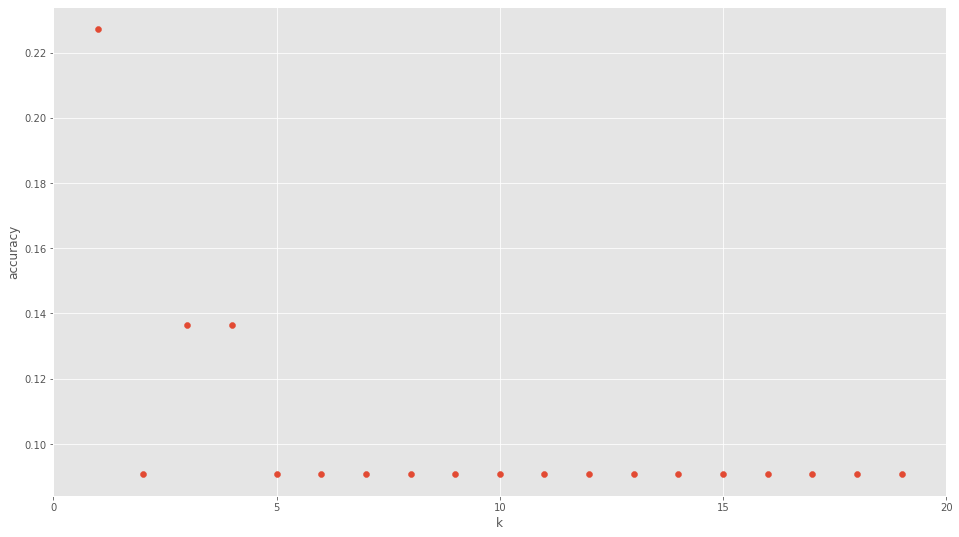

In [217]:

X_train_verbs, X_test_verbs, y_train_verbs, y_test_verbs = train_test_split(X_verbs, y_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_verbs = scaler.fit_transform(X_train_verbs)
X_test_verbs = scaler.transform(X_test_verbs)

k_range_verbs = range(1, 20)
scores_verbs = []
for k in k_range_verbs:
    knn_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_verbs.fit(X_train_verbs, y_train_verbs)
    scores_verbs.append(knn_verbs.score(X_test_verbs, y_test_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_verbs, scores_verbs)
plt.xticks([0,5,10,15,20])


In [218]:
n_neighbors_verbs = 1
 
knn_verbs = KNeighborsClassifier(n_neighbors_verbs)
knn_verbs.fit(X_train_verbs, y_train_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_verbs.score(X_train_verbs, y_train_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_verbs.score(X_test_verbs, y_test_verbs)))
	 
	 
pred_verbs = knn_verbs.predict(X_test_verbs)
print(confusion_matrix(y_test_verbs, pred_verbs))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.23
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0

# 15 frames


In [275]:
df_15 = pd.read_csv('C:/Users/BRENDA/Documents/SOTA/KNN/PSL-GAN-ad521b837aa1cabd3bbc6e72459104d0ca7cb72a/data_15_new.csv')

df_15

,videoname,axis,n_frame,n_landmark,coordinate
0,ustedes_25,x,0,0,0.503444
1,ustedes_25,x,0,1,0.531401
2,ustedes_25,x,0,2,0.548882
3,ustedes_25,x,0,3,0.566963
4,ustedes_25,x,0,4,0.476303
...,...,...,...,...,...
420895,él_311,y,20,18,0.446793
420896,él_311,y,20,19,0.798213
420897,él_311,y,20,20,0.413768
420898,él_311,y,20,21,0.789132


In [276]:
df_15['class'] = df_15['videoname'].apply(lambda x: x.split('_')[0])
x_15 = df_15.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_15['videoname']))
temp_15 = pd.DataFrame(x_15['coordinate'].tolist())
temp_15

[' ustedes_25' 'A-L-E-X_271' 'A-L-E-X_275' 'A-N-D-R-E-A_236'
 'C A R B O H I D R A T O S_533' 'C A R B O H I D R A T O S_554'
 'C H U Ñ O_107' 'C H U Ñ O_225' 'M I N E R A L E S_398'
 'M I N E R A L E S_536' 'M-A-R-C-O_269' 'M-A-R-C-O_273'
 'P A T R I C I A_526' 'P A T R I C I A_615' 'P A T R I C I A_8'
 'P R O T E I N A S_543' 'P R O T E I N A_550' 'P-A-T-I_234'
 'P-A-T-R-I-C-I-A_4' 'P-U-B-E-R-T-A-D_52' 'PA T R I C I A_515' 'Perú_512'
 '_440' '___794' '____812' 'abuelo_255' 'abuelo_262' 'abuelo_266'
 'abuelo_30' 'aceptar_185' 'aceptar_66' 'acuerdo_112' 'adentro_150'
 'adulto_804' 'agrupar_353' 'agrupar_558' 'agua_177' 'agua_184' 'agua_537'
 'ahora_243' 'ahora_246' 'ahora_64' 'ahora_690' 'ahora_74' 'ahora_801'
 'alegría_254' 'alegría_284' 'alimento_343' 'alimentos_693' 'alrededor_94'
 'amarrar_181' 'ambiente_203' 'ambiente_229' 'amigo_105' 'amigo_171'
 'andar_157' 'animal_671' 'animales_652' 'animales_675' 'animales_702'
 'anotar_809' 'antes_114' 'antes_248' 'antes_283' 'antes_41' 'ant

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
0,0.503444,0.531401,0.548882,0.566963,0.476303,0.462477,0.449118,0.599518,0.428249,0.545454,...,0.827433,0.615501,0.718102,0.406324,0.724464,0.390011,0.683126,0.377848,0.676832,0.390939
1,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.678018,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085
2,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.606166,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895
3,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.701851,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628
4,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.842199,0.755442,0.730248,0.445257,0.724478,0.366920,0.672014,0.336893,0.666748,0.366592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.683784,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078
606,0.508835,0.536478,0.555312,0.573428,0.480663,0.464396,0.451070,0.598913,0.426453,0.549684,...,0.880632,0.652744,0.852640,0.414760,0.905487,0.390617,0.854842,0.386318,0.834345,0.401696
607,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,0.552738,...,0.830198,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243
608,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.813259,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603


In [277]:
temp_15.insert(0,"instance",[' ustedes_25','A-L-E-X_271','A-L-E-X_275','A-N-D-R-E-A_236'
,'C A R B O H I D R A T O S_533','C A R B O H I D R A T O S_554'
,'C H U Ñ O_107','C H U Ñ O_225','M I N E R A L E S_398'
,'M I N E R A L E S_536','M-A-R-C-O_269','M-A-R-C-O_273'
,'P A T R I C I A_526','P A T R I C I A_615','P A T R I C I A_8'
,'P R O T E I N A S_543','P R O T E I N A_550','P-A-T-I_234'
,'P-A-T-R-I-C-I-A_4','P-U-B-E-R-T-A-D_52','PA T R I C I A_515','Perú_512'
,'_440','___794','____812','abuelo_255','abuelo_262','abuelo_266'
,'abuelo_30','aceptar_185','aceptar_66','acuerdo_112','adentro_150'
,'adulto_804','agrupar_353','agrupar_558','agua_177','agua_184','agua_537'
,'ahora_243','ahora_246','ahora_64','ahora_690','ahora_74','ahora_801'
,'alegría_254','alegría_284','alimento_343','alimentos_693','alrededor_94'
,'amarrar_181','ambiente_203','ambiente_229','amigo_105','amigo_171'
,'andar_157','animal_671','animales_652','animales_675','animales_702'
,'anotar_809','antes_114','antes_248','antes_283','antes_41','antes_82'
,'aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'aproximadamente_193','aproximadamente_745','aproximado_707','aquí_189'
,'aquí_631','asco_293','atención_305','aumentar_413','avanzar_160'
,'ayudarme_574','ayudarte_808','balancear_428','beneficio_411','bien_16'
,'bien_174','bien_230','bien_241','bien_244','bien_278','bien_295'
,'bien_329','bien_39','bien_401','bien_561','bien_95','bienvenida_5'
,'botar_201','botar_205','brotar planta_137','brotar_117','buen_0'
,'bueno_77','cada,uno_563','cada,uno_714','cada,uno_748','cambiar_108'
,'cambiar_140','cambiar_50','cantidad_447','carne_111','carne_218'
,'carne_423','carne_683','carne_687','casa_156','casa_256','casa_29'
,'cerdo_685','colegio_757','colores_798','colores_813','comer_144'
,'comer_248','comer_286','comer_303','comer_323','comer_335','comer_355'
,'comer_412','comer_414','comer_422','comer_426','comer_437','comer_444'
,'comer_529','comer_560','comer_590','comer_625','comer_644','comer_70'
,'comer_705','comer_709','comer_712','comer_765','comida_539','conocer_79'
,'conocer_83','contenta_238','contento_516','contento_74','continuar_106'
,'continuar_26','continuar_356','continuar_88','controlar_144'
,'controlar_176','controlar_192','convivencia_245','crecer_120'
,'crecer_136','cuaderno_55','cuaderno_810','cuadricula_796'
,'cuadrícula_811','cualquiera_34','cubrir_180','cuerpo_476','cuerpo_597'
,'cuerpo_599','cuerpo_605','cuerpo_67','cumplir_109','cuál_251','cuál_389'
,'cuándo_346','cuánto_405','cuánto_460','cuánto_703','cuánto_744'
,'cuántos_443','cuántos_620','cómo_12','cómo_171','cómo_223','cómo_427'
,'cómo_44','cómo_85','cómo_90','dar_68','darte_375','decir_138'
,'decir_265','dejar,frasco_191','dejar_129','dentro_486','dentro_532'
,'dentro_55','dentro_566','dentro_596','dentro_692','dentro_73'
,'depende_716','descubrir_14','despierto_594','destapar_183'
,'diariamente_402','diariamente_479','diariamente_785','dibujar_261'
,'diez_57','diferentes_471','diferentes_569','diferentes_668'
,'diferentes_689','diferentes_750','diferentes_84','doce_59','dormir_268'
,'dos_280','dos_669','día_1','día_197','día_261','dónde_678','echar_185'
,'edad_60','edad_718','educar_24','ejemplo_430','ejercicios_726'
,'ejercicios_728','ella_616','ellos_746','ellos_754','ellos_767'
,'ellos_772','emoción_143','emoción_249','emoción_250','emoción_272'
,'emoción_281','emoción_286','emoción_43','emoción_45','emoción_54'
,'emoción_71','emoción_93','empezar_32','enojar_102','enojar_124'
,'enojar_276','enojar_99','enojo_177','ensalada_436','enseñarme_498'
,'entender_137','entender_141','entonces_364','entonces_480','escribir_56'
,'escribir_62','escribir_797','escribir_807','ese_138','ese_143','ese_214'
,'ese_642','ese_719','eso_110','este_63','explicar_42','faltar_142'
,'familia_165','familia_204','familia_75','feliz_15','feliz_274'
,'fluir_187','fortalecer_548','fortalecer_582','frecuentemente_192'
,'frijol_175','frijol_216','frijol_434','fuerte_153','fuerte_240'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_487','fuerza_581','fácil_255','fácil_319'
,'fácil_341','ganar_118','gaseosa_331','gracias_233','grande_139'
,'grasa_396','grasa_534','grasa_553','gritar_122','guardar_105'
,'guardar_87','guardar_97','gustar_453','habitación_270','hablar_542'
,'hacer_158','hacer_172','hacer_191','hasta_58','hermano_116'
,'hermano_169','hermanos_32','historia_212','hola_508','hola_509'
,'hola_513','hola_632','hombre_720','hoy_218','hoy_221','hoy_521'
,'hoy_540','huevo_679','identificar_279','impaciente_165','importante_545'
,'importante_629','importante_636','impulsar_593','incluir_394'
,'incluir_400','informar_482','ingerir_546','inteligente_259'
,'interesante_113','interesante_610','ira_285','ira_290','jugar_115'
,'jugar_130','jugar_98','juntarse_33','juntos_36','juntos_618'
,'juntos_621','listo_31','llamar_46','llamar_614','llorar_120','luego_188'
,'lugar_20','madre_42','mal_273','mal_287','mamá_139','mamá_154'
,'mamá_264','manejar_78','manera_85','mañana_2','mejor_167','menos_166'
,'meter_178','miedo_292','ministerio_11','ministerio_23','mirarme_741'
,'mismos_182','mostrar_46','mover_589','mundo_15','más,o,menos_61'
,'más,o,menos_752','más,o,menos_766','más_592','músculo_586','nada_155'
,'necesitar_147','necesitar_474','necesitar_713','niveles_473','niños_2'
,'niños_510','niños_749','niños_756','niños_776','no_108','no_111'
,'no_166','no_289','no_333','no_462','nombre_73','normal_198'
,'nosotros_181','nosotros_183','nuevo_141','o_272','objetivo_208'
,'objetivo_220','olvidar_52','paciencia_153','paciencia_158','padre_41'
,'papa_424','papas,fritas_332','participar_637','pensar_189','pensar_213'
,'pensar_378','pensar_406','pensar_461','pensar_613','pensar_623'
,'pensar_753','pensar_771','perder_127','perfecto_36','pero_376'
,'pero_442','pero_496','persona_715','pescado_684','planta_119'
,'planta_133','planta_142','planta_159','planta_173','planta_215'
,'planta_217','planta_435','plantarse_135','poder_645','poder_84'
,'pollo_686','porcentaje_491','porcentaje_495','porcentaje_507'
,'porción_421','porción_425','positivo_199','preguntar_75','preguntas_236'
,'preguntas_59','primaria_22','primaria_5','primero_174','primo_104'
,'primo_38','probar_254','probar_317','probar_67','problema_227'
,'proceso_170','proceso_351','propia_213','proteina_551','proteína_393'
,'proteína_531','proteínas_370','proteínas_572','proteínas_648'
,'proteínas_676','proteínas_694','proteínas_784','pubertad_48'
,'querer_257','queso_354','quinto_3','quinto_758','quinto_773'
,'quinua_325','quién_232','quién_499','qué_212','qué_274','qué_573'
,'qué_727','razón_146','razón_658','recordar_169','recordar_206'
,'recordar_247','recordar_62','recuerdas_287','regla_110','regla_800'
,'regla_814','relación_161','resolver_225','rociar_203','saber_388'
,'sacar_96','sal_112','salud_271','salud_345','seco_222','seguir_13'
,'seguro_18','seleccionar_222','seleccionar_68','semana_180','semana_40'
,'semana_64','sentir_14','sentir_149','sentir_16','sentir_187','sentir_38'
,'sentir_458','sentir_591','sentir_602','sentir_604','sentir_89'
,'sexto_24','sexto_4','sexto_759','sexto_774','siguiente,1_206'
,'siguiente,cinco_210','siguiente_216','solo_663','sorpresa_294','sí_155'
,'sí_157','sí_159','sí_194','sí_240','sí_242','sí_251','sí_253','sí_277'
,'sí_281','sí_359','sí_37','sí_633','sí_76','sí_79','sí_83','también_114'
,'también_124','también_201','también_552','también_598','televisión_129'
,'tema_541','temperatura_109','tiempo_49','tiempo_91','todo_320'
,'todo_327','todo_511','todo_58','todo_606','todos_43','tristeza_291'
,'tú_154','tú_247','tú_288','unión_168','uno_260','uno_674','usar_214'
,'ustedes_239','ustedes_25','ustedes_520','vaca_653','vaca_662','vaca_688'
,'valor_469','valor_764','venir_26','venir_29','venir_31','venir_617'
,'venir_806','venir_818','ver_128','ver_264','ver_279','ver_49','ver_622'
,'verduras_673','vitamina_397','vitaminas_328','vitaminas_366'
,'vitaminas_535','volver_786','ya_115','ya_35','yo_125','yo_152','yo_193'
,'yo_235','yo_630','él_290','él_295','él_311'],True)



In [278]:
temp_15['class'] = temp_15['instance'].apply(lambda x: x.split('_')[0])

In [279]:
temp_15

,instance,0,1,2,3,4,5,6,7,8,...,681,682,683,684,685,686,687,688,689,class
0,ustedes_25,0.503444,0.531401,0.548882,0.566963,0.476303,0.462477,0.449118,0.599518,0.428249,...,0.615501,0.718102,0.406324,0.724464,0.390011,0.683126,0.377848,0.676832,0.390939,ustedes
1,A-L-E-X_271,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,...,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085,A-L-E-X
2,A-L-E-X_275,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,...,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895,A-L-E-X
3,A-N-D-R-E-A_236,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,...,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628,A-N-D-R-E-A
4,C A R B O H I D R A T O S_533,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,...,0.755442,0.730248,0.445257,0.724478,0.366920,0.672014,0.336893,0.666748,0.366592,C A R B O H I D R A T O S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,yo_235,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
606,yo_630,0.508835,0.536478,0.555312,0.573428,0.480663,0.464396,0.451070,0.598913,0.426453,...,0.652744,0.852640,0.414760,0.905487,0.390617,0.854842,0.386318,0.834345,0.401696,yo
607,él_290,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,...,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243,él
608,él_295,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,...,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603,él


In [280]:
dataset_15 = temp_15.iloc[ : ,1:693]


In [281]:
dataset_15

,0,1,2,3,4,5,6,7,8,9,...,681,682,683,684,685,686,687,688,689,class
0,0.503444,0.531401,0.548882,0.566963,0.476303,0.462477,0.449118,0.599518,0.428249,0.545454,...,0.615501,0.718102,0.406324,0.724464,0.390011,0.683126,0.377848,0.676832,0.390939,ustedes
1,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.688751,0.528536,0.647720,0.481324,0.652714,0.454793,0.617886,0.468775,0.609085,A-L-E-X
2,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.709747,0.432744,0.665757,0.371173,0.673648,0.351798,0.654842,0.372853,0.641895,A-L-E-X
3,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.647522,0.483880,0.684630,0.430537,0.714716,0.397417,0.679540,0.409956,0.666628,A-N-D-R-E-A
4,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.755442,0.730248,0.445257,0.724478,0.366920,0.672014,0.336893,0.666748,0.366592,C A R B O H I D R A T O S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.439165,0.464585,0.481023,0.494094,0.417041,0.402074,0.386852,0.515541,0.370315,0.472931,...,0.669212,0.705542,0.678035,0.705141,0.699973,0.666761,0.663582,0.663482,0.651078,yo
606,0.508835,0.536478,0.555312,0.573428,0.480663,0.464396,0.451070,0.598913,0.426453,0.549684,...,0.652744,0.852640,0.414760,0.905487,0.390617,0.854842,0.386318,0.834345,0.401696,yo
607,0.518331,0.540626,0.555228,0.567278,0.489013,0.469613,0.452663,0.590598,0.425570,0.552738,...,0.831145,0.839525,0.528520,0.891854,0.454663,0.839058,0.424683,0.819029,0.449243,él
608,0.500710,0.526540,0.543197,0.556609,0.472630,0.453960,0.435362,0.578777,0.414568,0.536728,...,0.852450,0.840776,0.539131,0.897207,0.465956,0.848791,0.438871,0.827169,0.459603,él


In [282]:
X_15 = dataset_15.iloc[:,:-1].values
y_15 = dataset_15.iloc[:,-1].values

In [283]:
X_15

array([[0.5034439 , 0.53140098, 0.54888189, ..., 0.37784848, 0.67683166,
        0.39093903],
       [0.46418068, 0.48754507, 0.50205845, ..., 0.61788642, 0.46877483,
        0.60908526],
       [0.41979352, 0.43647838, 0.45126101, ..., 0.65484178, 0.3728528 ,
        0.64189488],
       ...,
       [0.51833123, 0.54062569, 0.55522799, ..., 0.42468324, 0.81902939,
        0.44924268],
       [0.50071037, 0.52654034, 0.54319745, ..., 0.43887141, 0.82716894,
        0.45960298],
       [0.50100517, 0.52434278, 0.54087126, ..., 0.41376814, 0.78913236,
        0.44206053]])

In [284]:
y_15

array([' ustedes', 'A-L-E-X', 'A-L-E-X', 'A-N-D-R-E-A',
       'C A R B O H I D R A T O S', 'C A R B O H I D R A T O S',
       'C H U Ñ O', 'C H U Ñ O', 'M I N E R A L E S', 'M I N E R A L E S',
       'M-A-R-C-O', 'M-A-R-C-O', 'P A T R I C I A', 'P A T R I C I A',
       'P A T R I C I A', 'P R O T E I N A S', 'P R O T E I N A',
       'P-A-T-I', 'P-A-T-R-I-C-I-A', 'P-U-B-E-R-T-A-D', 'PA T R I C I A',
       'Perú', '', '', '', 'abuelo', 'abuelo', 'abuelo', 'abuelo',
       'aceptar', 'aceptar', 'acuerdo', 'adentro', 'adulto', 'agrupar',
       'agrupar', 'agua', 'agua', 'agua', 'ahora', 'ahora', 'ahora',
       'ahora', 'ahora', 'ahora', 'alegría', 'alegría', 'alimento',
       'alimentos', 'alrededor', 'amarrar', 'ambiente', 'ambiente',
       'amigo', 'amigo', 'andar', 'animal', 'animales', 'animales',
       'animales', 'anotar', 'antes', 'antes', 'antes', 'antes', 'antes',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender

In [285]:
Labelencoder_Y = LabelEncoder()
y_15= Labelencoder_Y.fit_transform(y_15)
y_15

array([  1,   2,   2,   3,   4,   4,   5,   5,   6,   6,   7,   7,   8,
         8,   8,  10,   9,  11,  12,  13,  14,  15,   0,   0,   0,  16,
        16,  16,  16,  17,  17,  18,  19,  20,  21,  21,  22,  22,  22,
        23,  23,  23,  23,  23,  23,  24,  24,  25,  26,  27,  28,  29,
        29,  30,  30,  31,  32,  33,  33,  33,  34,  35,  35,  35,  35,
        35,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  37,  37,
        38,  39,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  48,
        48,  48,  48,  48,  48,  48,  48,  48,  48,  48,  49,  50,  50,
        52,  51,  53,  54,  55,  55,  55,  56,  56,  56,  57,  58,  58,
        58,  58,  58,  59,  59,  59,  60,  61,  62,  62,  63,  63,  63,
        63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,  63,
        63,  63,  63,  63,  63,  63,  63,  64,  65,  65,  66,  67,  67,
        68,  68,  68,  68,  69,  69,  69,  70,  71,  71,  72,  72,  73,
        74,  75,  76,  77,  77,  77,  77,  77,  78,  79,  79,  8

In [286]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_15 = scaler.fit_transform(X_train_15)
X_test_15 = scaler.transform(X_test_15)

([<matplotlib.axis.XTick at 0x27280b35388>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

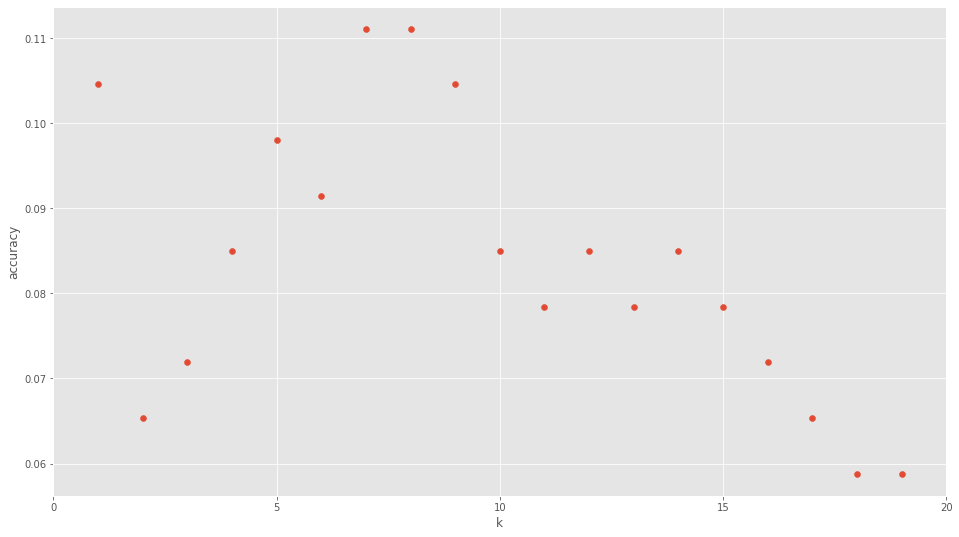

In [287]:
k_range_15 = range(1, 20)
scores_15 = []
for k in k_range_15:
    knn_15 = KNeighborsClassifier(n_neighbors = k)
    knn_15.fit(X_train_15, y_train_15)
    scores_15.append(knn_15.score(X_test_15, y_test_15))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_15, scores_15)
plt.xticks([0,5,10,15,20])

In [288]:
n_neighbors_15 = 8
 
knn_15 = KNeighborsClassifier(n_neighbors_15)
knn_15.fit(X_train_15, y_train_15)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_15.score(X_train_15, y_train_15)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_15.score(X_test_15, y_test_15)))
	 
import pandas as pd
#pd.set_option('display.max_rows', 11500)
#pd.set_option('display.max_columns', 11500)
#pd.set_option('display.width', 111000)
#pd.set_option('display.expand_frame_repr', False)

# Environment settings: 
'''
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
'''
#pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

#pd.options.display.max_rows = 999

pred_15 = knn_15.predict(X_test_15)
cf_matrix_15 = confusion_matrix(y_test_15, pred_15)
print(cf_matrix_15)

Accuracy of K-NN classifier on training set: 0.25
Accuracy of K-NN classifier on test set: 0.11
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


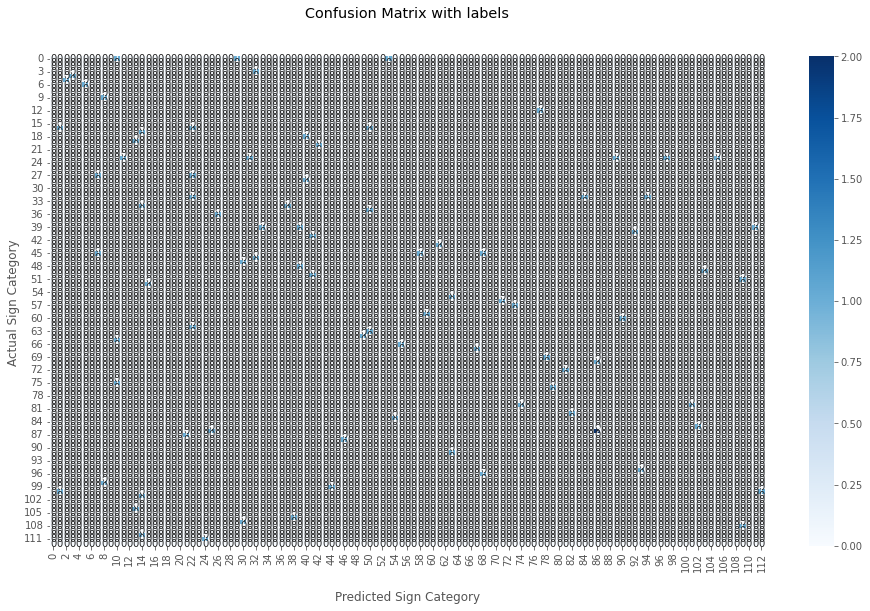

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

ax_15 = sns.heatmap(cf_matrix_15, annot=True, cmap='Blues')

ax_15.set_title('Confusion Matrix with labels\n\n');
ax_15.set_xlabel('\nPredicted Sign Category')
ax_15.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

'''
temp1 = ax.xaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp1.array()


temp2 = ax.yaxis.set_ticklabels(['abuelo', 'agua', 'ahora', 'antes', 'aprender', 'aquí', 'bien',
       'carne', 'casa', 'comer', 'continuar', 'controlar', 'cuerpo',
       'cuánto', 'cómo', 'decir', 'dentro', 'diferentes', 'ellos',
       'emoción', 'enojar', 'escribir', 'ese', 'familia', 'frijol',
       'fuerte', 'fácil', 'grasa', 'hacer', 'hermano', 'hola', 'hoy',
       'juntos', 'mal', 'mamá', 'niños', 'no', 'pensar', 'pero', 'planta',
       'poder', 'proteínas', 'quinto', 'qué', 'recordar', 'sentir',
       'sexto', 'sí', 'también', 'todo', 'tú', 'venir', 'ver', 'ya', 'yo',
       'él'])

temp2.shape
'''
## Display the visualization of the Confusion Matrix.
plt.show()




# Verbs : 15 frames

In [289]:

verbs_15 = dataset_15.loc[(dataset_15['class'] == 'aceptar') | (dataset['class'] == 'agrupar')  | 
 (dataset['class'] == 'amarrar') | (dataset['class'] == 'andar') | 
(dataset['class'] == 'anotar') | (dataset['class'] == 'aprender') | 
(dataset['class'] == 'aumentar') | (dataset['class'] == 'avanzar') | 
(dataset['class'] == 'balancear') | (dataset['class'] == 'botar') | 
(dataset['class'] == 'brotar') | (dataset['class'] == 'cambiar') | 
(dataset['class'] == 'comer')  | (dataset['class'] == 'conocer') | 
(dataset['class'] == 'continuar')  | (dataset['class'] == 'controlar') | 
(dataset['class'] == 'crecer')  | (dataset['class'] == 'cubrir') | 
(dataset['class'] == 'cumplir')  | (dataset['class'] == 'dar') | 
(dataset['class'] == 'decir')  | (dataset['class'] == 'dejar') | 
(dataset['class'] == 'descubrir')  | (dataset['class'] == 'destapar') | 
(dataset['class'] == 'dibujar')  | (dataset['class'] == 'dormir') | 
(dataset['class'] == 'echar')  | (dataset['class'] == 'educar') | 
(dataset['class'] == 'enojar')  | (dataset['class'] == 'entender') | 
(dataset['class'] == 'escribir')  | (dataset['class'] == 'explicar') | 
(dataset['class'] == 'faltar')  | (dataset['class'] == 'fluir') | 
(dataset['class'] == 'fortalecer')  | (dataset['class'] == 'ganar') | 
(dataset['class'] == 'gritar')  | (dataset['class'] == 'guardar') | 
(dataset['class'] == 'gustar')  | (dataset['class'] == 'hablar') | 
(dataset['class'] == 'hacer')  | (dataset['class'] == 'identificar') | 
(dataset['class'] == 'impulsar')  | (dataset['class'] == 'incluir') | 
(dataset['class'] == 'informar')  | (dataset['class'] == 'ingerir') | 

(dataset['class'] == 'jugar')  | (dataset['class'] == 'llamar') | 
(dataset['class'] == 'llorar')  | (dataset['class'] == 'manejar') | 
(dataset['class'] == 'meter')  | (dataset['class'] == 'mostrar') | 
(dataset['class'] == 'mover')  | (dataset['class'] == 'necesitar') | 
(dataset['class'] == 'olvidar')  | 

(dataset['class'] == 'participar')  | (dataset['class'] == 'pensar') | 
(dataset['class'] == 'perder')  | (dataset['class'] == 'poder') | 
(dataset['class'] == 'preguntar')  | (dataset['class'] == 'probar') | 
(dataset['class'] == 'querer')  | (dataset['class'] == 'recordar') | 
(dataset['class'] == 'resolver') | 

(dataset['class'] == 'rociar')  | 

(dataset['class'] == 'saber')  | (dataset['class'] == 'sacar') | 
(dataset['class'] == 'seguir')  | (dataset['class'] == 'seleccionar') | 
(dataset['class'] == 'sentir')  | (dataset['class'] == 'usar') | 
(dataset['class'] == 'valor')  | (dataset['class'] == 'venir') | 
(dataset['class'] == 'ver') | (dataset['class'] == 'volver')
]
print (verbs_15)

            0         1         2         3         4         5         6  \
27   0.504347  0.515761  0.526263  0.535340  0.479179  0.460419  0.441318   
29   0.472934  0.503864  0.521181  0.538423  0.451923  0.436140  0.425098   
30   0.482780  0.494463  0.503126  0.514140  0.456795  0.439871  0.422552   
38   0.466637  0.500605  0.516896  0.531536  0.450647  0.433315  0.419702   
49   0.460550  0.480044  0.494443  0.510545  0.438609  0.423799  0.406303   
..        ...       ...       ...       ...       ...       ...       ...   
331  0.472700  0.490796  0.505654  0.521862  0.453221  0.439993  0.427302   
332  0.511632  0.539939  0.554911  0.571291  0.483428  0.462622  0.445507   
333  0.510944  0.538830  0.555025  0.568213  0.481204  0.463187  0.445305   
334  0.489520  0.519533  0.537483  0.551822  0.466838  0.449038  0.434753   
340  0.489360  0.508500  0.523895  0.536816  0.461308  0.442392  0.423144   

            7         8         9  ...       681       682       683  \
27 

([<matplotlib.axis.XTick at 0x27286a67f48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

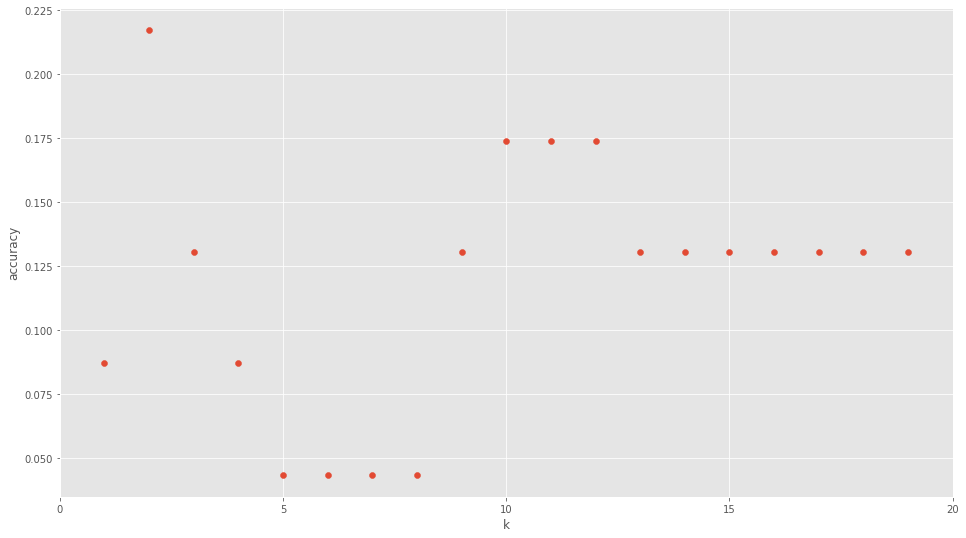

In [290]:
X_verbs_15 = verbs_15.iloc[:,:-1].values
y_verbs_15 = verbs_15.iloc[:,-1].values


X_train_verbs_15, X_test_verbs_15, y_train_verbs_15, y_test_verbs_15 = train_test_split(X_verbs_15, y_verbs_15, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_verbs_15 = scaler.fit_transform(X_train_verbs_15)
X_test_verbs_15 = scaler.transform(X_test_verbs_15)

k_range_verbs_15 = range(1, 20)
scores_verbs_15 = []
for k in k_range_verbs_15:
    knn_verbs_15 = KNeighborsClassifier(n_neighbors = k)
    knn_verbs_15.fit(X_train_verbs_15, y_train_verbs_15)
    scores_verbs_15.append(knn_verbs_15.score(X_test_verbs_15, y_test_verbs_15))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_verbs_15, scores_verbs_15)
plt.xticks([0,5,10,15,20])



In [291]:
n_neighbors_verbs_15 = 2
 
knn_verbs_15 = KNeighborsClassifier(n_neighbors_verbs_15)
knn_verbs_15.fit(X_train_verbs_15, y_train_verbs_15)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_verbs_15.score(X_train_verbs_15, y_train_verbs_15)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_verbs_15.score(X_test_verbs_15, y_test_verbs_15)))
	 
	 
pred_verbs_15 = knn_verbs_15.predict(X_test_verbs_15)
print(confusion_matrix(y_test_verbs_15, pred_verbs_15))

Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.22
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# 10 frames


In [168]:
df_10 = pd.read_csv('C:/Users/BRENDA/Documents/SOTA/KNN/PSL-GAN-ad521b837aa1cabd3bbc6e72459104d0ca7cb72a/data_10.csv')

df_10

,videoname,axis,n_frame,n_landmark,coordinate
0,ustedes_25,x,0,0,0.503444
1,ustedes_25,x,0,1,0.531401
2,ustedes_25,x,0,2,0.548882
3,ustedes_25,x,0,3,0.566963
4,ustedes_25,x,0,4,0.476303
...,...,...,...,...,...
407095,él_524,y,12,18,0.437368
407096,él_524,y,12,19,0.798172
407097,él_524,y,12,20,0.403721
407098,él_524,y,12,21,0.781043


In [170]:
df_10['class'] = df_10['videoname'].apply(lambda x: x.split('_')[0])
x_10 = df_10.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10['videoname']))
temp_10 = pd.DataFrame(x_10['coordinate'].tolist())
temp_10

[' ustedes_25' 'A-L-E-X_271' 'A-L-E-X_275' 'A-N-D-R-E-A_236'
 'C A R B O H I D R A T O S_533' 'C A R B O H I D R A T O S_554'
 'C H U Ñ O_107' 'C H U Ñ O_225' 'M I N E R A L E S_398'
 'M I N E R A L E S_536' 'M-A-R-C-O_269' 'M-A-R-C-O_273' 'NN_493'
 'P A T R I C I A_526' 'P A T R I C I A_615' 'P A T R I C I A_8'
 'P R O T E I N A S_543' 'P R O T E I N A_550' 'P-A-T-I_234'
 'P-A-T-R-I-C-I-A_4' 'P-U-B-E-R-T-A-D_52' 'PA T R I C I A_515' 'Perú_512'
 '_440' '___794' '____812' 'abrir_198' 'abuelo_255' 'abuelo_258'
 'abuelo_262' 'abuelo_266' 'abuelo_30' 'aceptar_185' 'aceptar_66'
 'acuerdo_112' 'adentro_150' 'adentro_677' 'adulto_804' 'agrupar_104'
 'agrupar_353' 'agrupar_558' 'agua_177' 'agua_184' 'agua_190' 'agua_202'
 'agua_399' 'agua_537' 'agua_95' 'ahora_243' 'ahora_246' 'ahora_463'
 'ahora_64' 'ahora_690' 'ahora_739' 'ahora_74' 'ahora_793' 'ahora_801'
 'ahí_101' 'ahí_151' 'ahí_231' 'alegría_254' 'alegría_284' 'alegría_289'
 'alimento_343' 'alimentos_693' 'alrededor_94' 'amarrar_181' 'am

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
0,0.503444,0.531401,0.548882,0.566963,0.476303,0.462477,0.449118,0.599518,0.428249,0.545454,...,0.827433,0.615501,0.718102,0.406324,0.724464,0.390011,0.683126,0.377848,0.676832,0.390939
1,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,0.497573,...,0.680244,0.681765,0.528990,0.646768,0.475210,0.652529,0.450812,0.614717,0.466429,0.609027
2,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,0.440791,...,0.602100,0.709764,0.430874,0.665300,0.368944,0.673540,0.350786,0.654825,0.372442,0.641874
3,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,0.462610,...,0.665540,0.640513,0.441048,0.673428,0.382597,0.703281,0.351880,0.674670,0.372448,0.660597
4,0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,0.527831,...,0.842139,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.500673,0.526518,0.543180,0.556586,0.472580,0.453912,0.435310,0.578794,0.414564,0.536681,...,0.813423,0.853264,0.833435,0.540685,0.882536,0.467583,0.837141,0.440332,0.820371,0.461397
881,0.492540,0.525454,0.542195,0.555075,0.469439,0.452230,0.434557,0.580603,0.411692,0.528720,...,0.829972,0.822120,0.820002,0.505558,0.863716,0.432779,0.812686,0.401806,0.795996,0.433421
882,0.500900,0.524289,0.540835,0.553660,0.472350,0.454673,0.437757,0.580940,0.414715,0.537370,...,0.834482,0.836436,0.832040,0.518119,0.878521,0.444560,0.824059,0.411980,0.806336,0.440321
883,0.494765,0.525170,0.538252,0.554562,0.472826,0.452142,0.436134,0.588620,0.417423,0.529356,...,0.850971,0.839531,0.823440,0.518925,0.867326,0.447034,0.818224,0.423119,0.802312,0.450372


In [171]:

temp_10.insert(0,"instance",[' ustedes_25','A-L-E-X_271','A-L-E-X_275','A-N-D-R-E-A_236'
,'C,A,R,B,O,H,I,D,R,A,T,O,S_533','C,A,R,B,O,H,I,D,R,A,T,O,S_554'
,'C,H,U,Ñ,O_107','C,H,U,Ñ,O_225','M,I,N,E,R,A,L,E,S_398'
,'M,I,N,E,R,A,L,E,S_536','M-A-R-C-O_269','M-A-R-C-O_273','NN_493'
,'P,A,T,R,I,C,I,A_526','P,A,T,R,I,C,I,A_615','P,A,T,R,I,C,I,A_8'
,'P,R,O,T,E,I,N,A,S_543','P,R,O,T,E,I,N,A_550','P-A-T-I_234'
,'P-A-T-R-I-C-I-A_4','P-U-B-E-R-T-A-D_52','PA,T,R,I,C,I,A_515','Perú_512'
,'_440','___794','____812','abrir_198','abuelo_255','abuelo_258'
,'abuelo_262','abuelo_266','abuelo_30','aceptar_185','aceptar_66'
,'acuerdo_112','adentro_150','adentro_677','adulto_804','agrupar_104'
,'agrupar_353','agrupar_558','agua_177','agua_184','agua_190','agua_202'
,'agua_399','agua_537','agua_95','ahora_243','ahora_246','ahora_463'
,'ahora_64','ahora_690','ahora_739','ahora_74','ahora_793','ahora_801'
,'ahí_101','ahí_151','ahí_231','alegría_254','alegría_284','alegría_289'
,'alimento_343','alimentos_693','alrededor_94','amarrar_181','amarrar_204'
,'ambiente_203','ambiente_229','amigo_105','amigo_171','andar_157'
,'animal_671','animales_652','animales_675','animales_702','anotar_809'
,'antes_114','antes_248','antes_283','antes_41','antes_82','antes_89'
,'aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'aproximadamente_193','aproximadamente_745','aproximado_707','aquí_189'
,'aquí_19','aquí_330','aquí_631','asco_293','atención_305','aumentar_413'
,'avanzar_160','avisar_37','ayudar_163','ayudarme_574','ayudarte_808'
,'balancear_428','beneficio_411','bien_147','bien_16','bien_17','bien_174'
,'bien_230','bien_241','bien_244','bien_278','bien_288','bien_294'
,'bien_295','bien_329','bien_337','bien_39','bien_401','bien_416'
,'bien_561','bien_626','bien_95','bienvenida_5','bonito_1','botar_201'
,'botar_205','brotar,planta_137','brotar_117','brotar_136','buen_0'
,'buen_151','bueno_77','buscar_69','cada,uno_563','cada,uno_714'
,'cada,uno_748','cambiar_108','cambiar_140','cambiar_50','cantidad_447'
,'carne_111','carne_218','carne_326','carne_423','carne_683','carne_687'
,'carne_98','casa_156','casa_19','casa_256','casa_29','casa_9','cerdo_685'
,'cinco_196','colegio_757','colores_798','colores_813','comer_123'
,'comer_144','comer_146','comer_148','comer_164','comer_231','comer_238'
,'comer_248','comer_286','comer_293','comer_303','comer_309','comer_312'
,'comer_313','comer_323','comer_335','comer_355','comer_408','comer_414'
,'comer_422','comer_426','comer_437','comer_444','comer_452','comer_470'
,'comer_475','comer_477','comer_484','comer_489','comer_529','comer_560'
,'comer_590','comer_625','comer_644','comer_70','comer_705','comer_709'
,'comer_712','comer_743','comer_747','comer_765','comer_86','comida_539'
,'comunidad_244','conocer_245','conocer_79','conocer_83','conservada_220'
,'contenta_238','contento_516','contento_74','continuar_106'
,'continuar_26','continuar_356','continuar_88','controlar_144'
,'controlar_176','controlar_178','controlar_192','convivencia_245'
,'crecer_120','crecer_136','cuaderno_55','cuaderno_810','cuadricula_796'
,'cuadrícula_811','cualquiera_34','cuando_88','cuatro_194','cubrir_180'
,'cuerpo_446','cuerpo_476','cuerpo_51','cuerpo_597','cuerpo_599'
,'cuerpo_605','cuerpo_67','cumplir_109','cuál_251','cuál_389','cuáles_649'
,'cuándo_346','cuánto_405','cuánto_420','cuánto_445','cuánto_448'
,'cuánto_456','cuánto_460','cuánto_468','cuánto_483','cuánto_703'
,'cuánto_706','cuánto_708','cuánto_742','cuánto_744','cuántos_443'
,'cuántos_620','cómo_12','cómo_171','cómo_223','cómo_230','cómo_379'
,'cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','dar_68','darte_375'
,'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433'
,'decir_528','decir_755','decir_789','decirme_525','dejar,frasco_191'
,'dejar_129','dejar_131','dentro_241','dentro_369','dentro_371'
,'dentro_457','dentro_486','dentro_532','dentro_55','dentro_566'
,'dentro_596','dentro_603','dentro_627','dentro_647','dentro_664'
,'dentro_692','dentro_73','depende_716','descubrir_14','despierto_594'
,'destapar_183','dia_134','diariamente_402','diariamente_479'
,'diariamente_785','diariamiente_710','dibujar_211','dibujar_261'
,'diez_57','diferente_454','diferente_71','diferentes_471'
,'diferentes_569','diferentes_668','diferentes_689','diferentes_750'
,'diferentes_84','difícil_92','doce_59','dolor_601','dormir_268','dos_280'
,'dos_669','día_1','día_197','día_261','días_211','dónde_678','echar_185'
,'edad_60','edad_718','educar_24','ejemplo_430','ejercicios_726'
,'ejercicios_728','ella_527','ella_616','ellos_559','ellos_746'
,'ellos_754','ellos_767','ellos_772','emoción_143','emoción_145'
,'emoción_188','emoción_249','emoción_250','emoción_272','emoción_281'
,'emoción_286','emoción_43','emoción_45','emoción_54','emoción_71'
,'emoción_81','emoción_93','empezar_219','empezar_32','enojar_102'
,'enojar_107','enojar_124','enojar_276','enojar_99','enojo_177'
,'ensalada_436','enseñarme_498','entender_137','entender_141'
,'entonces_364','entonces_480','escribir_56','escribir_60','escribir_62'
,'escribir_797','escribir_807','ese_121','ese_138','ese_143','ese_214'
,'ese_544','ese_608','ese_638','ese_642','ese_719','eso_110','este_63'
,'explicar_42','faltar_142','familia_165','familia_204','familia_45'
,'familia_75','feliz_15','feliz_274','fluir_187','fortalecer_548'
,'fortalecer_582','frecuentemente_192','frijol_132','frijol_175'
,'frijol_216','frijol_434','fuerte_152','fuerte_153','fuerte_240'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_487','fuerte_571','fuerte_588'
,'fuerte_628','fuerza_581','fácil_255','fácil_318','fácil_319','fácil_341'
,'ganar_118','gaseosa_331','gracias_233','grande_139','grasa_396'
,'grasa_534','grasa_553','grasa_557','gritar_122','guardar_105'
,'guardar_87','guardar_97','gustar_439','gustar_453','habitación_267'
,'habitación_270','hablar_542','hacer_158','hacer_161','hacer_172'
,'hacer_191','hacer_81','hasta_58','hermano_100','hermano_116'
,'hermano_150','hermano_169','hermano_39','hermano_40','hermanos_32'
,'historia_212','hola_508','hola_509','hola_513','hola_632','hombre_720'
,'hoy_127','hoy_218','hoy_221','hoy_521','hoy_540','huevo_679','idea_10'
,'idea_21','identificar_279','impaciente_165','importante_545'
,'importante_629','importante_636','impulsar_593','incluir_394'
,'incluir_400','información_607','informar_482','ingerir_546'
,'inteligente_259','interesante_113','interesante_610','ir_202','ira_285'
,'ira_290','jugar_115','jugar_130','jugar_98','juntarse_33','junto_47'
,'juntos_36','juntos_517','juntos_519','juntos_618','juntos_621'
,'leche_680','listo_31','llamar_46','llamar_614','llorar_120','luego_188'
,'lugar_20','madre_42','mal_250','mal_273','mal_287','mal_299','mal_301'
,'mal_334','mal_336','mamá_139','mamá_154','mamá_264','mamá_28'
,'manejar_78','manejar_86','manera_85','mañana_2','mejor_167','menos_166'
,'meter_178','mi_6','miedo_292','ministerio_11','ministerio_23'
,'mirarme_741','mismos_182','mostrar_257','mostrar_46','mover_589'
,'mujer_721','mundo_15','más,o,menos_61','más,o,menos_752'
,'más,o,menos_766','más_47','más_592','músculo_586','nada_155'
,'necesitar_147','necesitar_474','necesitar_713','niveles_473','niños_2'
,'niños_510','niños_749','niños_756','niños_776','no_108','no_111'
,'no_166','no_289','no_297','no_333','no_462','no_667','nombre_7'
,'nombre_73','normal_198','nosotros_181','nosotros_183','nosotros_65'
,'nuevo_141','o_195','o_272','o_722','objetivo_208','objetivo_220'
,'olvidar_52','paciencia_153','paciencia_158','padre_41','papa_424'
,'papas,fritas_332','papá_263','papá_27','participar_637','pedirte_815'
,'pensar_189','pensar_213','pensar_235','pensar_339','pensar_378'
,'pensar_406','pensar_450','pensar_461','pensar_600','pensar_61'
,'pensar_613','pensar_623','pensar_640','pensar_641','pensar_66'
,'pensar_753','pensar_771','pensar_97','perder_127','perfecto_36'
,'pero_376','pero_442','pero_496','pero_611','pero_660','persona_715'
,'pescado_684','planta_119','planta_133','planta_142','planta_159'
,'planta_173','planta_215','planta_217','planta_435','plantarse_135'
,'poder_162','poder_645','poder_77','poder_84','pollo_686','poner_72'
,'por,qué_126','porcentaje_491','porcentaje_495','porcentaje_507'
,'porción_421','porción_425','positivo_199','precisa_609','preguntar_732'
,'preguntar_75','preguntas_236','preguntas_59','preocupar_167'
,'priimero_670','primaria_22','primaria_5','primaria_775','primero_174'
,'primo_104','primo_38','probar_254','probar_317','probar_67'
,'problema_227','proceso_170','proceso_351','profesor_252','profesor_817'
,'propia_213','proteina_551','proteína_393','proteína_531','proteína_704'
,'proteínas_370','proteínas_572','proteínas_648','proteínas_676'
,'proteínas_694','proteínas_784','pubertad_48','que_148','que_190'
,'querer_257','queso_354','quien_497','quinto_23','quinto_3','quinto_758'
,'quinto_773','quinua_325','quién_232','quién_499','qué_212','qué_274'
,'qué_304','qué_417','qué_573','qué_727','qué_731','qué__131','razón_146'
,'razón_658','recordar_169','recordar_206','recordar_247','recordar_62'
,'recuerdas_287','regla_110','regla_800','regla_814','relación_161'
,'relación_163','resolver_225','rociar_203','saber_388','sacar_96'
,'sal_112','salud_239','salud_271','salud_345','saludable_227'
,'saludable__233','seco_222','seguir_13','segundo_672','seguro_18'
,'seguro_21','seleccionar_222','seleccionar_68','semana_180','semana_40'
,'semana_64','sembrar_118','sentir_14','sentir_149','sentir_16'
,'sentir_187','sentir_38','sentir_458','sentir_53','sentir_547'
,'sentir_570','sentir_591','sentir_602','sentir_604','sentir_89','ser_226'
,'ser_342','sexto_24','sexto_4','sexto_759','sexto_774','siguiente,1_206'
,'siguiente,cinco_210','siguiente,dos_207','siguiente,tres_208'
,'siguiente_216','silencio_132','solo_661','solo_663','sorpresa_294'
,'sí_155','sí_157','sí_159','sí_194','sí_200','sí_228','sí_240','sí_242'
,'sí_251','sí_253','sí_277','sí_278','sí_281','sí_284','sí_291','sí_306'
,'sí_315','sí_359','sí_37','sí_419','sí_565','sí_633','sí_657','sí_659'
,'sí_76','sí_79','sí_83','sí__228','también_114','también_124'
,'también_182','también_201','también_552','también_595','también_598'
,'también_799','tapar_179','televisión_129','tema_541','temperatura_109'
,'tener_184','tener_530','tiempo_49','tiempo_91','todo_320','todo_327'
,'todo_511','todo_58','todo_606','todos_43','tristeza_291','tu_28'
,'título_6','tú_154','tú_168','tú_172','tú_176','tú_205','tú_207','tú_229'
,'tú_243','tú_247','tú_263','tú_277','tú_288','tú_407','tú_53','tú_619'
,'tú_63','tú_635','tú_639','tú_691','tú_711','tú_740','tú_791','tú_80'
,'tú_803','tú_96','un_650','unir_162','unión_168','uno_260','uno_666'
,'uno_674','usar_214','usar_90','ustedes_239','ustedes_25','ustedes_520'
,'vaca_653','vaca_662','vaca_688','valor_469','valor_485','valor_764'
,'varios_258','venir_26','venir_29','venir_31','venir_54','venir_617'
,'venir_806','venir_818','ver_128','ver_264','ver_279','ver_49','ver_494'
,'ver_622','verduras_673','vitamina_397','vitaminas_328','vitaminas_366'
,'vitaminas_535','voltear_199','volver_786','ya_115','ya_125','ya_30'
,'ya_35','ya_350','ya_78','yo_113','yo_119','yo_121','yo_123','yo_125'
,'yo_140','yo_152','yo_164','yo_193','yo_235','yo_237','yo_3','yo_630'
,'él_285','él_290','él_295','él_302','él_311','él_500','él_524'],True)



In [172]:
temp_10['class'] = temp_10['instance'].apply(lambda x: x.split('_')[0])
temp_10

,instance,0,1,2,3,4,5,6,7,8,...,451,452,453,454,455,456,457,458,459,class
0,ustedes_25,0.503444,0.531401,0.548882,0.566963,0.476303,0.462477,0.449118,0.599518,0.428249,...,0.615501,0.718102,0.406324,0.724464,0.390011,0.683126,0.377848,0.676832,0.390939,ustedes
1,A-L-E-X_271,0.464181,0.487545,0.502058,0.515145,0.439742,0.424265,0.409853,0.541829,0.393068,...,0.681765,0.528990,0.646768,0.475210,0.652529,0.450812,0.614717,0.466429,0.609027,A-L-E-X
2,A-L-E-X_275,0.419794,0.436478,0.451261,0.464932,0.397283,0.383784,0.364783,0.486125,0.338944,...,0.709764,0.430874,0.665300,0.368944,0.673540,0.350786,0.654825,0.372442,0.641874,A-L-E-X
3,A-N-D-R-E-A_236,0.429239,0.456416,0.475240,0.494813,0.414709,0.400667,0.387529,0.531373,0.389449,...,0.640513,0.441048,0.673428,0.382597,0.703281,0.351880,0.674670,0.372448,0.660597,A-N-D-R-E-A
4,"C,A,R,B,O,H,I,D,R,A,T,O,S_533",0.489015,0.506586,0.522309,0.534440,0.456742,0.438655,0.420824,0.559260,0.396784,...,0.767395,0.730240,0.456255,0.724380,0.378769,0.672062,0.348807,0.666785,0.380310,"C,A,R,B,O,H,I,D,R,A,T,O,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,él_295,0.500673,0.526518,0.543180,0.556586,0.472580,0.453912,0.435310,0.578794,0.414564,...,0.853264,0.833435,0.540685,0.882536,0.467583,0.837141,0.440332,0.820371,0.461397,él
881,él_302,0.492540,0.525454,0.542195,0.555075,0.469439,0.452230,0.434557,0.580603,0.411692,...,0.822120,0.820002,0.505558,0.863716,0.432779,0.812686,0.401806,0.795996,0.433421,él
882,él_311,0.500900,0.524289,0.540835,0.553660,0.472350,0.454673,0.437757,0.580940,0.414715,...,0.836436,0.832040,0.518119,0.878521,0.444560,0.824059,0.411980,0.806336,0.440321,él
883,él_500,0.494765,0.525170,0.538252,0.554562,0.472826,0.452142,0.436134,0.588620,0.417423,...,0.839531,0.823440,0.518925,0.867326,0.447034,0.818224,0.423119,0.802312,0.450372,él


In [174]:
dataset_10 = temp_10.iloc[ : ,1:923]


X_10 = dataset_10.iloc[:,:-1].values
y_10 = dataset_10.iloc[:,-1].values


In [175]:
Labelencoder_Y = LabelEncoder()
y_10= Labelencoder_Y.fit_transform(y_10)
y_10

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_10 = scaler.fit_transform(X_train_10)
X_test_10 = scaler.transform(X_test_10)

([<matplotlib.axis.XTick at 0x2726ba3f8c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

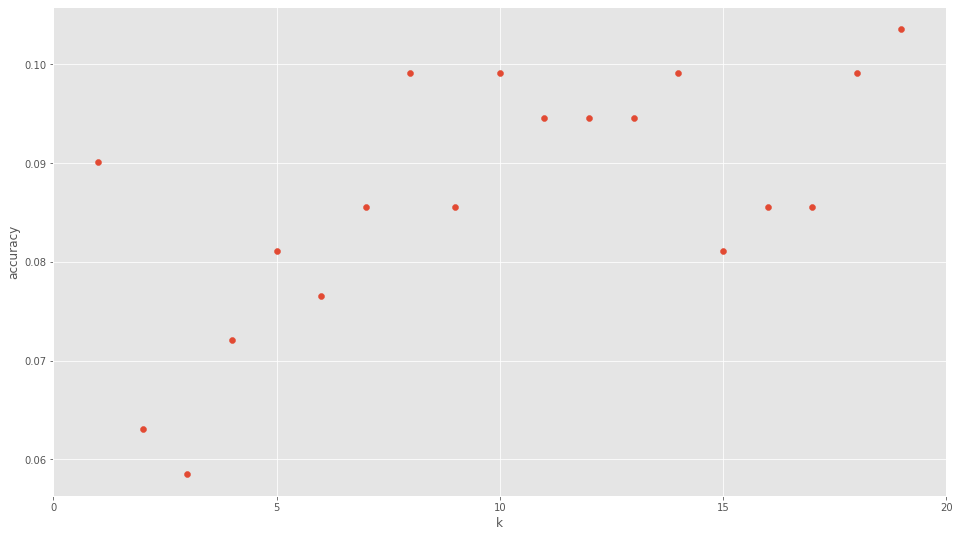

In [177]:
k_range_10 = range(1, 20)
scores_10 = []
for k in k_range_10:
    knn_10 = KNeighborsClassifier(n_neighbors = k)
    knn_10.fit(X_train_10, y_train_10)
    scores_10.append(knn_10.score(X_test_10, y_test_10))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_10, scores_10)
plt.xticks([0,5,10,15,20])


In [180]:
n_neighbors_10 = 1
 
knn_10 = KNeighborsClassifier(n_neighbors_10)
knn_10.fit(X_train_10, y_train_10)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10.score(X_train_10, y_train_10)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10.score(X_test_10, y_test_10)))
	 
import pandas as pd
#pd.set_option('display.max_rows', 11500)
#pd.set_option('display.max_columns', 11500)
#pd.set_option('display.width', 111000)
#pd.set_option('display.expand_frame_repr', False)

# Environment settings: 
'''
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)
'''
#pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

#pd.options.display.max_rows = 999

pred_10 = knn_10.predict(X_test_10)
cf_matrix_10 = confusion_matrix(y_test_10, pred_10)
print(cf_matrix_10)

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.09
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


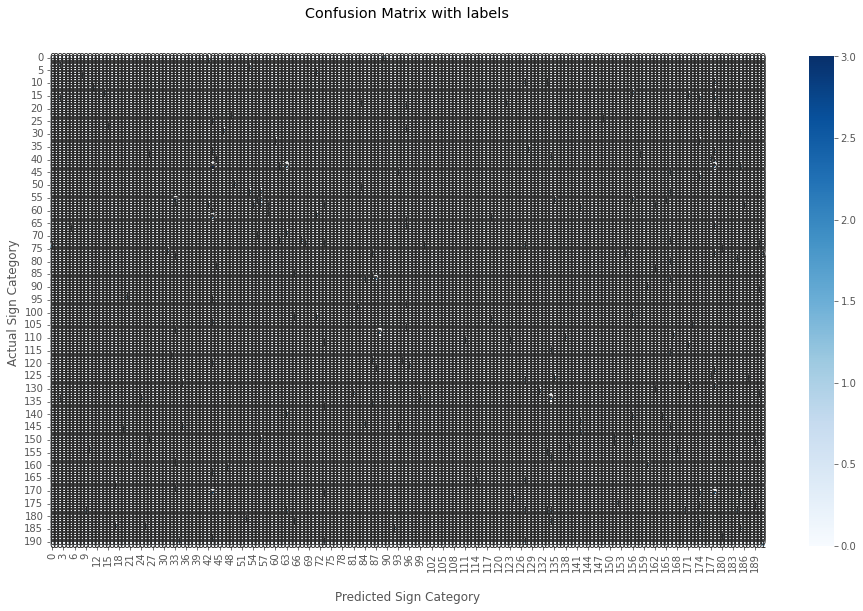

In [181]:
 
import seaborn as sns
import matplotlib.pyplot as plt

ax_10 = sns.heatmap(cf_matrix_10, annot=True, cmap='Blues')

ax_10.set_title('Confusion Matrix with labels\n\n');
ax_10.set_xlabel('\nPredicted Sign Category')
ax_10.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# verbs

In [189]:
verbs_10 = dataset_10.loc[(dataset_10['class'] == 'abrir') | (dataset['class'] == 'aceptar')  | 
 (dataset['class'] == 'agrupar') | (dataset['class'] == 'amarrar') | 
(dataset['class'] == 'andar') | (dataset['class'] == 'anotar') | 
(dataset['class'] == 'aprender') | (dataset['class'] == 'aumentar') | 
(dataset['class'] == 'avanzar') | (dataset['class'] == 'avisar') | 
(dataset['class'] == 'ayudar') | (dataset['class'] == 'balancear') | 
(dataset['class'] == 'botar')  | (dataset['class'] == 'brotar') | 
(dataset['class'] == 'buscar')  | (dataset['class'] == 'cambiar') | 
(dataset['class'] == 'comer')  | (dataset['class'] == 'conocer') | 
(dataset['class'] == 'continuar')  | (dataset['class'] == 'controlar') | 
(dataset['class'] == 'crecer')  | (dataset['class'] == 'cubrir') | 
(dataset['class'] == 'cumplir')  | (dataset['class'] == 'dar') | 
(dataset['class'] == 'decir')  | (dataset['class'] == 'dejar') | 
(dataset['class'] == 'descubrir')  | (dataset['class'] == 'destapar') | 
(dataset['class'] == 'dibujar')  | (dataset['class'] == 'dormir') | 
(dataset['class'] == 'echar')  | (dataset['class'] == 'educar') | 
(dataset['class'] == 'empezar')  | (dataset['class'] == 'enojar') | 
(dataset['class'] == 'entender')  | (dataset['class'] == 'escribir') | 
(dataset['class'] == 'explicar')  | (dataset['class'] == 'faltar') | 
(dataset['class'] == 'fluir')  | (dataset['class'] == 'fortalecer') | 
(dataset['class'] == 'gritar')  | (dataset['class'] == 'guardar') | 
(dataset['class'] == 'gustar')  | (dataset['class'] == 'hablar') | 
(dataset['class'] == 'hacer')  | (dataset['class'] == 'identificar') | 

(dataset['class'] == 'impulsar')  | (dataset['class'] == 'incluir') | 
(dataset['class'] == 'informar')  | (dataset['class'] == 'ingerir') | 
(dataset['class'] == 'jugar')  | (dataset['class'] == 'manejar') | 
(dataset['class'] == 'meter')  | (dataset['class'] == 'mostrar') | 
(dataset['class'] == 'mover')  | (dataset['class'] == 'necesitar') | 
(dataset['class'] == 'participar')  | (dataset['class'] == 'pensar') | 
(dataset['class'] == 'perder')  | (dataset['class'] == 'poder') | 
(dataset['class'] == 'poner')  | (dataset['class'] == 'preguntar') | 
(dataset['class'] == 'preocupar')  | (dataset['class'] == 'probar') | 
(dataset['class'] == 'querer')  | (dataset['class'] == 'recordar') | 
(dataset['class'] == 'resolver')  | (dataset['class'] == 'rociar') | 
(dataset['class'] == 'saber')  | (dataset['class'] == 'sacar') | 
(dataset['class'] == 'seguir')  | (dataset['class'] == 'seleccionar') | 
(dataset['class'] == 'sembrar')  | (dataset['class'] == 'sentir') | 
(dataset['class'] == 'tapar')  | (dataset['class'] == 'tener')  | 


(dataset['class'] == 'unir')  | (dataset['class'] == 'usar') | 
(dataset['class'] == 'venir')  | (dataset['class'] == 'ver') | 
(dataset['class'] == 'voltear')  

]
print (verbs)

            0         1         2         3         4         5         6  \
24   0.472934  0.503864  0.521181  0.538423  0.451923  0.436140  0.425098   
25   0.482780  0.494463  0.503126  0.514140  0.456795  0.439871  0.422552   
27   0.497845  0.529026  0.545068  0.560341  0.472364  0.453030  0.437002   
38   0.502783  0.532710  0.546385  0.563030  0.476005  0.456583  0.440240   
49   0.497058  0.520504  0.534275  0.545982  0.475575  0.459812  0.444983   
..        ...       ...       ...       ...       ...       ...       ...   
330  0.525064  0.545176  0.555418  0.570950  0.500507  0.484600  0.469765   
331  0.460975  0.483784  0.500249  0.516366  0.443912  0.430016  0.420240   
332  0.487486  0.517388  0.535448  0.549327  0.458295  0.437249  0.420642   
333  0.517188  0.557191  0.573435  0.589822  0.498925  0.480503  0.463488   
334  0.507952  0.537707  0.554970  0.567957  0.483009  0.463540  0.446642   

            7         8         9  ...       911       912       913  \
24 

([<matplotlib.axis.XTick at 0x2720adf5a48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

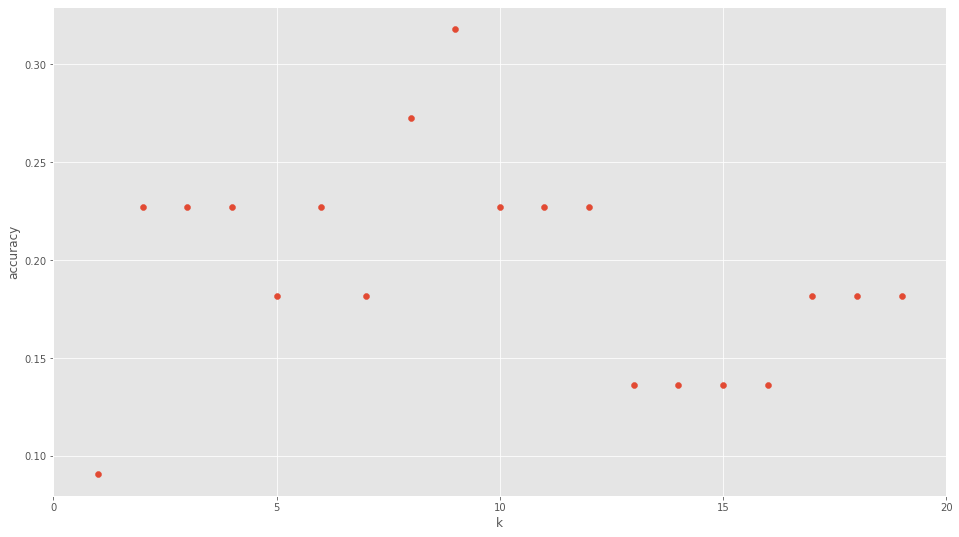

In [190]:
X_verbs_10 = verbs_10.iloc[:,:-1].values
y_verbs_10 = verbs_10.iloc[:,-1].values


X_train_verbs_10, X_test_verbs_10, y_train_verbs_10, y_test_verbs_10 = train_test_split(X_verbs_10, y_verbs_10, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_verbs_10 = scaler.fit_transform(X_train_verbs_10)
X_test_verbs_10 = scaler.transform(X_test_verbs_10)

k_range_verbs_10 = range(1, 20)
scores_verbs_10 = []
for k in k_range_verbs_10:
    knn_verbs_10 = KNeighborsClassifier(n_neighbors = k)
    knn_verbs_10.fit(X_train_verbs_10, y_train_verbs_10)
    scores_verbs_10.append(knn_verbs_10.score(X_test_verbs_10, y_test_verbs_10))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_verbs_10, scores_verbs_10)
plt.xticks([0,5,10,15,20])





In [191]:
n_neighbors_verbs_10 = 8
 
knn_verbs_10 = KNeighborsClassifier(n_neighbors_verbs_10)
knn_verbs_10.fit(X_train_verbs_10, y_train_verbs_10)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_verbs_10.score(X_train_verbs_10, y_train_verbs_10)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_verbs_10.score(X_test_verbs_10, y_test_verbs_10)))
	 
	                                  
pred_verbs_10 = knn_verbs_10.predict(X_test_verbs_10)
print(confusion_matrix(y_test_verbs_10, pred_verbs_10))


Accuracy of K-NN classifier on training set: 0.24
Accuracy of K-NN classifier on test set: 0.27
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


# PCA - 20 frames  

In [226]:

X_20_PCA = dataset.iloc[:,:-1].values
y_20_PCA = dataset.iloc[:,-1].values

In [228]:
X_20_PCA

array([[0.46418068, 0.48754507, 0.50205845, ..., 0.61788642, 0.46877483,
        0.60908526],
       [0.41979352, 0.43647838, 0.45126101, ..., 0.65484178, 0.3728528 ,
        0.64189488],
       [0.42923865, 0.4564161 , 0.47523952, ..., 0.67953998, 0.40995616,
        0.66662759],
       ...,
       [0.51833123, 0.54062569, 0.55522799, ..., 0.42468324, 0.81902939,
        0.44924268],
       [0.50071037, 0.52654034, 0.54319745, ..., 0.43887141, 0.82716894,
        0.45960298],
       [0.50100517, 0.52434278, 0.54087126, ..., 0.41376814, 0.78913236,
        0.44206053]])

In [230]:
# CENTRAR LOS DATOS

#La primera componente principal para un conjunto de atributos X1,X2,...,X es la combinación
#lineal normalizada de los atributos:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_20_PCA)

In [231]:
# Calculamos la matriz de covarianza

import numpy as np
cov_mat=np.cov(X_std.T)
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

#Covarianza: Grado de varianza conjunta
#Matriz de Covarianza

#[Var cov cov
#cov  var cov
#cov  cov var
#]

In [232]:
# Descomponer la matriz de varianza

#Calculamos los autovalores y autovectores de la matriz y los mostramos

#Autovalor=Eigenvalues

#Los autovalores muy bajos sugieren que las componentes correspondientes tienen poca relevancia

#Auto vector=Eigenvectors
#Matemáticamente, "v" es un vector propio y λ el valor propio correspondiente de una transformación T si verifica la ecuación: 
#T ( v λ ) = λ v
 
#donde T(vλ) es el vector obtenido al aplicar la transformación T a vλ. 
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.04092083e-02+0.j -3.80202003e-02+0.j  1.19674860e-02+0.j ...
  -5.34732775e-03+0.j -7.55152783e-03+0.j -1.06131761e-02+0.j]
 [ 2.07499922e-02+0.j -3.77161406e-02+0.j  1.04801084e-02+0.j ...
  -7.33350341e-04+0.j  1.19941634e-03+0.j  1.61713202e-03+0.j]
 [ 2.41451821e-02+0.j -3.64755266e-02+0.j  9.35790079e-03+0.j ...
  -9.12658189e-04+0.j -2.28346978e-03+0.j -1.44211881e-03+0.j]
 ...
 [-4.63815862e-03+0.j -7.10786217e-04+0.j  2.45211318e-02+0.j ...
   4.87159884e-02+0.j  4.06894342e-02+0.j  3.24821898e-02+0.j]
 [ 3.79239196e-02+0.j  1.03262670e-02+0.j -7.59607483e-03+0.j ...
   1.58402200e-02+0.j  3.32587837e-02+0.j  8.95004680e-03+0.j]
 [-2.30195264e-03+0.j -1.84370753e-05+0.j  2.63246725e-02+0.j ...
   6.91879588e-03+0.j -1.45481480e-02+0.j -1.87028889e-03+0.j]]

Eigenvalues 
[ 3.31149734e+02+0.00000000e+00j  1.51520919e+02+0.00000000e+00j
  6.85180131e+01+0.00000000e+00j  6.54954548e+01+0.00000000e+00j
  5.05061753e+01+0.00000000e+00j  4.03903681e+01+0.00000000e+0

In [233]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# ordenar en forma descendente:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden descendente
print('Autovalores en orden descendente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendente:
331.1497338507122
151.52091884351265
68.51801307436219
65.49545482804231
50.506175302662484
40.39036814776993
35.671144987289544
20.01930767579152
17.44301406793644
15.686193640214576
14.046445456134741
12.088517615021106
10.095770382008398
9.234389644008392
7.753952937891483
6.369260454638558
5.908890755408731
5.309550534241093
4.798199534715175
4.586385798084318
3.4910501256522197
3.2912466379894676
2.7395699406948717
2.3393871729861706
2.2363587759139136
2.2053843853437423
2.066819097972972
1.768867754175025
1.6347472442381557
1.3696357925026208
1.3480059131903566
1.303793625638598
1.1289211966431452
1.0441070711801597
0.9904636168895353
0.9023813177021303
0.8047566184937719
0.778734194123279
0.6947716359866537
0.6406684683321467
0.5941132624017221
0.5592539444149605
0.5178783481034431
0.48186477948378403
0.47600536905935115
0.4362214679953195
0.42326061486807814
0.3846436179975602
0.3714247936702388
0.3490946765155116
0.3304763925343163
0.314475952

In [234]:
import matplotlib.pyplot as plt
# Calculando la varianza total explica que será la suma de autovalores (si fuese 100% seria como no hacer nada)
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


In [235]:
print (cum_var_exp)

[ 35.89050584+0.00000000e+00j  52.31257074+0.00000000e+00j
  59.73865597+0.00000000e+00j  66.8371518 +0.00000000e+00j
  72.31108698+0.00000000e+00j  76.68865579+0.00000000e+00j
  80.55474809+0.00000000e+00j  82.72447074+0.00000000e+00j
  84.61497082+0.00000000e+00j  86.31506406+0.00000000e+00j
  87.83743893+0.00000000e+00j  89.14761064+0.00000000e+00j
  90.24180541+0.00000000e+00j  91.24264243+0.00000000e+00j
  92.08302751+0.00000000e+00j  92.77333753+0.00000000e+00j
  93.41375199+0.00000000e+00j  93.98920905+0.00000000e+00j
  94.50924513+0.00000000e+00j  95.00632452+0.00000000e+00j
  95.38468977+0.00000000e+00j  95.74140003+0.00000000e+00j
  96.03831874+0.00000000e+00j  96.29186504+0.00000000e+00j
  96.53424496+0.00000000e+00j  96.77326784+0.00000000e+00j
  96.9972728 +0.00000000e+00j  97.18898534+0.00000000e+00j
  97.36616171+0.00000000e+00j  97.51460489+0.00000000e+00j
  97.6607038 +0.00000000e+00j  97.80201091+0.00000000e+00j
  97.92436509+0.00000000e+00j  98.03752698+0.00000000e+0

# Conclusion: It can be seen that with 4 components more than 65% of the model can be explained.